# 패키치 설치 및 경로 설정

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import os
import operator
from matplotlib import rc
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# 코랩에서만 경로 설정
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/dacon/card_eda"

color = sns.color_palette('pastel')[:10]

# 간단한 데이터 설명

주어진 데이터는 아래와 같습니다.

df1는 블록별 **성별연령대**별 카드소비패턴  
df2는 블록별 **시간대**별소액결제건수 카드소비패턴  
df3는 집계구별 일별**소비지역**별 카드소비패턴    
df4는 집계구별 **일별**시간대별 카드소비패턴         
df5는 카드소비 **업종코드**  

각 데이터에서 중요하게 여겨지는 속성들 : 

" 성별연령대, 시간대, 소비지역, 년도/월/일"   
 
을 토대로 분석을 진행하였습니다.

추가적으로 필요하다고 판단되면 feature를 추가생성하여 분석을 진행하였습니다.

데이터들의 칼럼명 통일을 위해 칼럼명들을 동일하게 rename하였습니다. 

In [ ]:
#df1
df1 = pd.read_csv(path + "/블록별 성별연령대별 카드소비패턴.csv", encoding = 'cp949')
df1.rename(columns={'서울시민업종코드(UPJONG_CD)' : 'upjong_cd', '기준년월(YM)' : 'ym' , 
                         '고객주소블록코드(BLOCK_CD)' : 'block_cd', '성별(GEDNER)' : 'gender',
                        '연령대별(AGE)' : 'age', '카드이용금액계(AMT_CORR)' : 'amt_corr',
                         '카드이용건수계(USECT_CORR)' : 'usect_corr'}, inplace = True)
#df2
df2 = pd.read_csv(path + "/블록별 시간대별소액결제건수 카드소비패턴.csv", encoding = 'cp949')
df2.rename(columns = {'서울시민업종코드(UPJONG_CD)' : 'upjong_cd', '기준년월(YM)': 'ym','시간대구간(TIME)' : 'time' , 
                         '고객주소블록코드(BLOCK_CD)' : 'block_cd', '카드이용금액계(AMT_CORR)' : 'amt_corr', '소액결제건수(MICRO_PYM)': 'micro_pym'}, inplace = True)
#df3
df_3=pd.read_csv(path + "/집계구별 일별소비지역별 카드소비패턴.csv", encoding = 'cp949')
df_3.rename(columns = {'가맹점주소광역시도(SIDO)' : 'sido', '가맹점주소시군구(SGG)': 'sgg','업종대분류(UPJONG_CLASS1)' : 'class1' , '기준일자(YMD)':'ymd',
                         '고객주소집계구별(TOT_REG_CD)' : 'tot_reg_cd', '카드이용금액계(AMT_CORR)' : 'amt_corr', '카드이용건수계(USECT_CORR)': 'usect_corr'}, inplace = True)

#df4
df4=pd.read_csv(path + "/집계구별 일별시간대별 카드소비패턴.csv", encoding = 'cp949')

df4.rename(columns={'업종대분류(UPJONG_CLASS1)' : 'class1', '기준일자(YMD)' : 'ymd' , 
                         '시간대구간(TIME)' : 'time', '고객주소집계구별(TOT_REG_CD)' : 'tot_reg_cd',
                        '카드이용금액계(AMT_CORR)' : 'amt_corr',
                         '카드이용건수계(USECT_CORR)' : 'usect_corr'}, inplace = True)
#df5
df5=pd.read_csv(path + "/카드소비 업종코드.csv", encoding = 'cp949')
df5.rename(columns = {'업종코드(UPJONG_CD)' : 'upjong_cd', '대분류(CLASS1)' : 'class1' , 
                         '중분류(CLASS2)' : 'class2', '소분류(CLASS3)' : 'class3'}, inplace = True)



데이터들을 전체전으로 훑어본 결과  
DF1~DF4까지는 카드소비내역이고  
DF5는 업종코드에 따른 대/중/소분류 입니다.  

DF1~DF4의 업종코드와 DF5의 업종코드의 관계를 확인해보니   
업종코드는 업종을 설명해주는 **이름표**같은 역할이였습니다.   
따라서 하나의 업종은 무조건 이에 해당하는 업종코드(upjong_cd)가 존재합니다.  


DF5와 그 외 데이터들은 업종코드를 기준으로 묶임을 확인하였고 필요에 따라 DF1~DF4와 DF5를 합쳐주었습니다.


다음은 분석시 병합한 데이터이고 변수는 다음과 같습니다.  


DF1 + DF5 = DF  
DF2 + DF5 = DF2  
DF3 = DF_3  
DF4 + DF5 = DF4   


In [ ]:
#DF5와 그 외 데이터들은 업종코드를 기준으로 묶임
display(df5)
display(df1)

,upjong_cd,class1,class2,class3
0,ss001,요식/유흥,한식,한식
1,ss002,요식/유흥,일식/중식/양식,일식
2,ss003,요식/유흥,일식/중식/양식,양식
3,ss004,요식/유흥,일식/중식/양식,중식
4,ss005,요식/유흥,제과/커피/패스트푸드,제과점
...,...,...,...,...
70,ss084,스포츠/문화/레저,스포츠/문화/레저,스키
71,ss090,교육/학원,학원,입시보습학원
72,ss091,교육/학원,학원,외국어학원
73,ss092,교육/학원,학원,예체능학원


,upjong_cd,ym,block_cd,gender,age,amt_corr,usect_corr
0,SS013,201906,14037,F,50대,48288,65
1,SS048,201608,156830,M,30대,132792,10
2,SS016,202009,32925,M,50대,100600,25
3,SS001,201805,214245,F,30대,213876,40
4,SS044,201705,279472,M,30대,155930,5
...,...,...,...,...,...,...,...
495,SS012,201709,11449,F,30대,75450,45
496,SS044,201707,353037,F,30대,118708,25
497,SS054,201901,418149,F,20대,1056300,15
498,SS021,202009,269015,F,70대이상,25150,5


# DF1 : 성별 연령대별 카드소비패턴  
가장먼저 DF1을 살펴보겠습니다.  
DF1은 성별 연령대별 카드소비패턴 데이터이기 때문에
DF1에선 성별과 연령대별 카드 소비패턴에 집중해서 분석했습니다.

##전처리

In [ ]:
# DF1과 DF5를 고유코드 기준으로 병합했습니다.
df5.upjong_cd=df5.upjong_cd.str.upper() # DF5의 업종코드가 소문자여서 대문자로 바꾸는 작업을 거쳤습니다.
df = pd.merge(df1,df5, on = 'upjong_cd')
df = df.drop(['upjong_cd'],axis=1)
df

,ym,block_cd,gender,age,amt_corr,usect_corr,class1,class2,class3
0,201906,14037,F,50대,48288,65,유통,할인점/슈퍼마켓,할인점/슈퍼마켓
1,201710,282738,F,40대,2663385,10,유통,할인점/슈퍼마켓,할인점/슈퍼마켓
2,202005,24909,F,20대,960730,101,유통,할인점/슈퍼마켓,할인점/슈퍼마켓
3,202012,358999,M,40대,566831,5,유통,할인점/슈퍼마켓,할인점/슈퍼마켓
4,201602,216302,M,20대,422520,10,유통,할인점/슈퍼마켓,할인점/슈퍼마켓
...,...,...,...,...,...,...,...,...,...
495,201901,410159,M,60대,330974,5,가정생활/서비스,서비스,세탁소
496,201608,224910,F,70대이상,534538,10,미용,미용서비스,미용서비스
497,201601,218078,M,30대,79977,60,교육/학원,학원,외국어학원
498,201902,232932,F,20대,279718,65,스포츠/문화/레저,스포츠/문화/레저,실내골프


In [ ]:
#df의 block_cd의 의미를 파악해보려했습니다. 고유코드로 이용이 될까 싶어서 파헤쳐보니 같은 block_cd 를 가진 사람이 있었습니다.
#즉 같은 고유코드를 가진 사람은 같은 주소의 사람 (가족) 으로 추측하였습니다.
# 카드소비내역을 설명해주기엔 다소 모호한 부분이 있어서 제외하였습니다.
temp = pd.DataFrame(df1.groupby('block_cd')['gender'].value_counts())
temp.rename(columns = {'gender' : 'count'}, inplace=True)
display(temp.query('count == 2'))
display(df1.query("block_cd == 152747"))

,,count
block_cd,gender,
152747,M,2


,upjong_cd,ym,block_cd,gender,age,amt_corr,usect_corr
45,SS016,201911,152747,M,20대,13478242,5
251,SS008,201603,152747,M,30대,608831,10


# 이상치제거
이상치를 제거하는 과정을 거쳤습니다.  
이상치의 기준은 카드이용금액계(AMT_CORR)를 boxplot으로 시각화하여 지나치게 튀는 값들은 제거해 주었습니다.

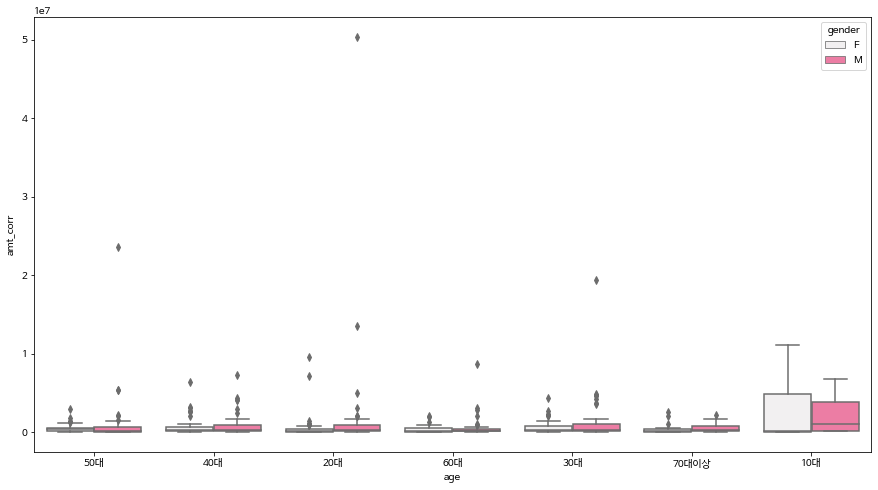

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(data=df, x="age", y="amt_corr", hue="gender",color= '#ff6a9e')
plt.show()

20대, 30대, 50대 에서 이상치가 발견되어 그 세 데이터는 제거하였습니다.  
최종적으로 총 **497**건의 데이터를 이용하여 분석을 시작하였습니다.

In [ ]:
print(df.query("age == '20대'")["amt_corr"].sort_values(ascending = False).index[0])
print(df.query("age == '30대'")["amt_corr"].sort_values(ascending = False).index[0])
print(df.query("age == '50대'")["amt_corr"].sort_values(ascending = False).index[0])
df = df.drop(index=[203,435,391])
df.reset_index(drop=True, inplace=True)
df

203
435
391


,ym,block_cd,gender,age,amt_corr,usect_corr,class1,class2,class3
0,201906,14037,F,50대,48288,65,유통,할인점/슈퍼마켓,할인점/슈퍼마켓
1,201710,282738,F,40대,2663385,10,유통,할인점/슈퍼마켓,할인점/슈퍼마켓
2,202005,24909,F,20대,960730,101,유통,할인점/슈퍼마켓,할인점/슈퍼마켓
3,202012,358999,M,40대,566831,5,유통,할인점/슈퍼마켓,할인점/슈퍼마켓
4,201602,216302,M,20대,422520,10,유통,할인점/슈퍼마켓,할인점/슈퍼마켓
...,...,...,...,...,...,...,...,...,...
492,201901,410159,M,60대,330974,5,가정생활/서비스,서비스,세탁소
493,201608,224910,F,70대이상,534538,10,미용,미용서비스,미용서비스
494,201601,218078,M,30대,79977,60,교육/학원,학원,외국어학원
495,201902,232932,F,20대,279718,65,스포츠/문화/레저,스포츠/문화/레저,실내골프


**카드이용고객수, 카드 총이용건수,  카드 이용금액 합계**를 통해  
어느 연령대에 고객이 많이 분포하는지와 카드를 많이 사용하는지를 알아보았습니다.

# 연령대별 고객분포
먼저 연령대별 고객분포입니다.   
1. 연령대별 고객분포를 보니 경제 활동이 활발한 **40대 30대 20 대** 순으로 고객이 많았습니다.

2. 반면에 카드이용고객수가 적은 연령대는 경제활동인구에 속하는 수가 적은 **10대, 70대이**상 순 이였습니다.

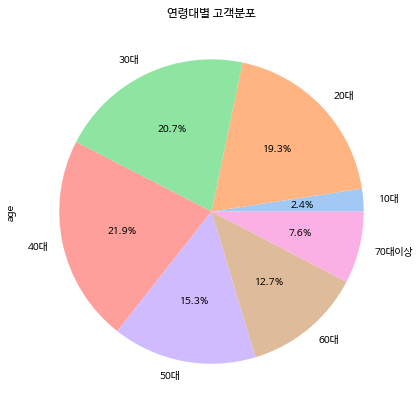

In [ ]:
age_cnt=df['age'].value_counts().sort_index()
plt.title("연령대별 고객분포")
age_cnt.plot(kind = 'pie', figsize=(7,7),autopct='%1.1f%%',colors = color)
plt.show()

# 연령별 카드 이용 건수 및 금액합계

카드 이용건수와 이용금액합계를 통해 보아도 20-50대의 비중이 높았습니다.

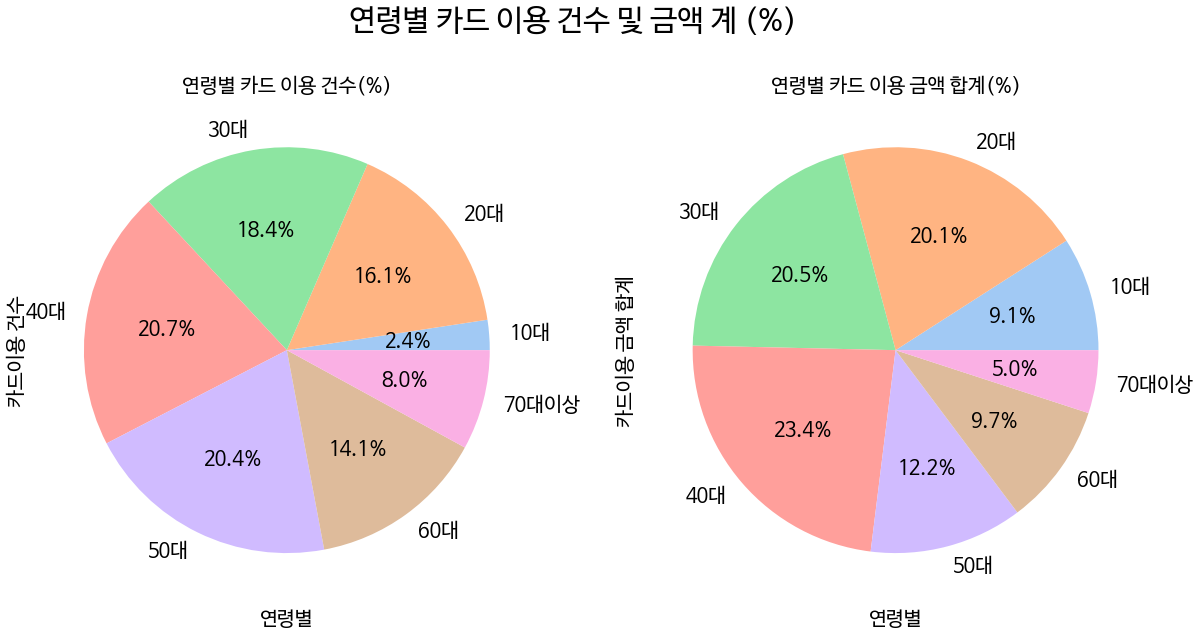

In [ ]:
a = df.groupby("age")["usect_corr"].sum()
b= df.groupby("age")["amt_corr"].sum()

plt.figure(figsize = (20, 10))

plt.subplot(1,2,1)
plt.title("연령별 카드 이용 건수(%)", fontsize=20)

a.plot(kind = 'pie', autopct='%1.1f%%',textprops= {'fontsize' : 20}, colors = color)
plt.xlabel('연령별', fontsize=20)
plt.ylabel('카드이용 건수',fontsize=20)

plt.subplot(1,2,2)
plt.title("연령별 카드 이용 금액 합계(%)", fontsize=20)

b.plot(kind = 'pie', autopct='%1.1f%%',textprops= {'fontsize' : 20}, colors = color)
plt.xlabel('연령별', fontsize=20)
plt.ylabel('카드이용 금액 합계', fontsize=20)

plt.suptitle('연령별 카드 이용 건수 및 금액 계 (%)', fontsize = 30)
plt.show()

*하지만 특이점이 하나 발견되었습니다. 10대가 카드사용건수 대비 사용금액이 높다는 점이였습니다. 그럼 10대는 대체 어디에 돈을 썼는지 알아보았으나 집계된 10대 데이터가 12개 뿐이여서 일반화의 오류가 생길것같아 넘어갔습니다.*

In [ ]:
df.query("age == '10대'")
#12명밖에 없음

,ym,block_cd,gender,age,amt_corr,usect_corr,class1,class2,class3
39,201708,412985,M,10대,998455,10,유통,편의점,편의점
151,201804,225283,M,10대,6698074,30,요식/유흥,기타요식,기타요식
183,202011,21080,F,10대,34204,126,의료,병원,종합병원
184,201605,229423,M,10대,144361,10,의료,병원,종합병원
258,201708,158050,F,10대,11102382,25,요식/유흥,일식/중식/양식,중식
402,202104,155457,M,10대,3772500,10,의료,병원,일반병원
424,201606,363663,F,10대,73589,10,전자상거래,전자상거래,홈쇼핑
432,202012,153424,F,10대,859627,10,미용,화장품,화장품
442,202104,343278,F,10대,169511,86,교육/학원,교육용품,교육용품
452,202006,272613,F,10대,8722976,50,주유,주유,LPG


다음으로는 연령대와 성별을 묶어 특정 연령대에 성비는 어떠한지 알아보았습니다. 

# 연령/성별 카드 이용 건수 및 이용 금액 합계
성별에 따른 카드 이용 건수와 카드 금액 합계를 보니 남녀차이가 그닥 크진 않지만    

1. 카드이용건수에선 여성이 남성보다 약 12%가량 높게
2. 카드이용금액에서 남성이 여성보다 약 12%가량 높게 나타납니다.  

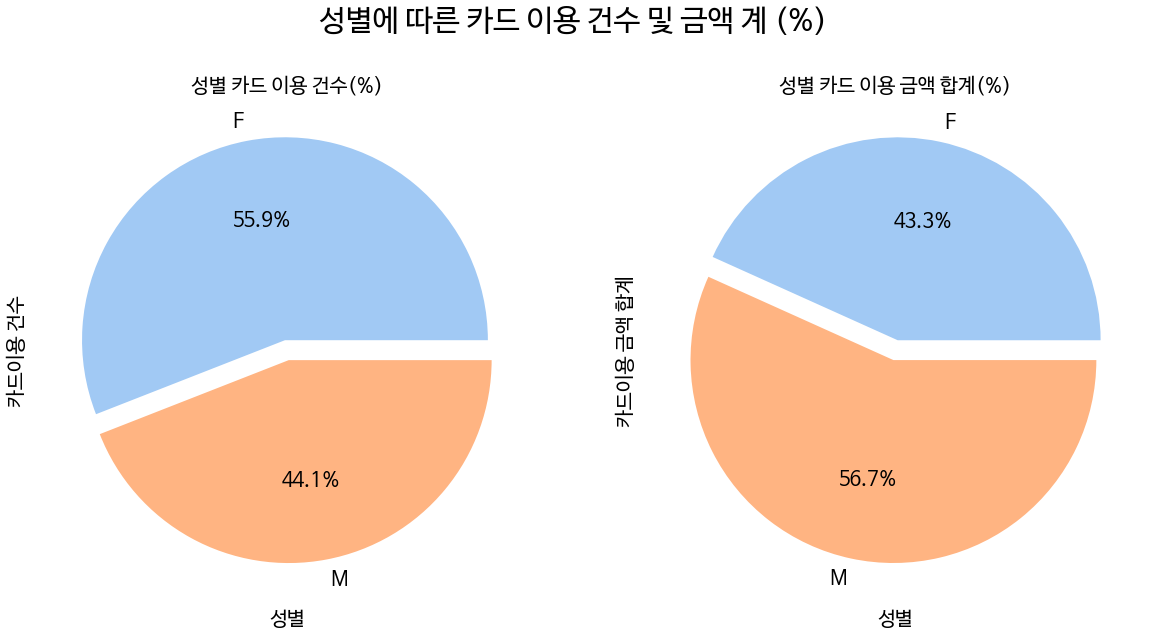

In [ ]:
a = df.groupby("gender")["usect_corr"].sum()
b= df.groupby("gender")["amt_corr"].sum()

plt.figure(figsize = (20, 10))

plt.subplot(1,2,1)
plt.title("성별 카드 이용 건수(%)", fontsize=20)

a.plot(kind = 'pie',explode = [0.05, 0.05], autopct='%1.1f%%',textprops= {'fontsize' : 20},colors = color)
plt.xlabel('성별', fontsize=20)
plt.ylabel('카드이용 건수',fontsize=20)

plt.subplot(1,2,2)
plt.title("성별 카드 이용 금액 합계(%)", fontsize=20)

b.plot(kind = 'pie',explode = [0.05, 0.05], autopct='%1.1f%%',textprops= {'fontsize' : 20},colors = color)
plt.xlabel('성별', fontsize=20)
plt.ylabel('카드이용 금액 합계', fontsize=20)

plt.suptitle('성별에 따른 카드 이용 건수 및 금액 계 (%)', fontsize = 30)
plt.show()

# 연령별 성별 비중
연령대별 성비를 살펴보니 대부분 남녀 성비가 비슷하지만   
카드이용고객수가 가장 많은 40대는 남성고객이 여성고객보다 차지하는 비중이 높았습니다. 

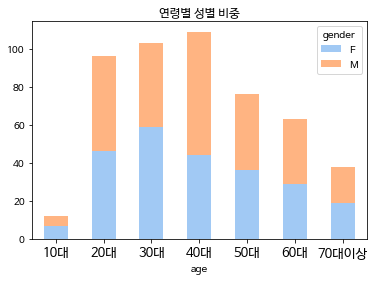

In [ ]:
# 연령별 성별 비중
stacked_bar_df = df.groupby(["age","gender"]).size().unstack()
stacked_bar_df.plot(kind='bar', stacked=True, color=color)
plt.title("연령별 성별 비중")
plt.xticks(rotation=0, fontsize=13)
plt.show()

# 연령/성별 카드 사용 총건수 (한사람이 여러번 쓴것 포함)

다음으론 연령/성별 카드 사용 총건수를 알아보았습니다. 

violinplot을 통해 카드사용건수를 시각화하면 연령대 별로 카드 사용횟수의 분포를 직관적으로 파악할 수 있고 무엇보다 밀도를 직관적으로 파악할 수 있다는 장점이 있습니다. 

아래 도식화된 그래프를 보면 여성 보다 남성이 더 방주형을 띈것을 보입니다. 즉, 밀도가 더 높습니다. 이는 남성이 여성보다 카드 사용횟수의 분산이 적은 반면 여성이 남성보다 소비에 있어서 카드사용의 분산이 크다는걸 알 수 있습니다. 

따라서 **여성이 남성보다 카드를 많이 쓰는 사람과 적게 쓰는 사람의 차이가 크고 그 분포가 넓**다는 것이 확인 됩니다.

특히 **50,60대 여성**의 소비에서 이러한 현상이 두드러집니다.

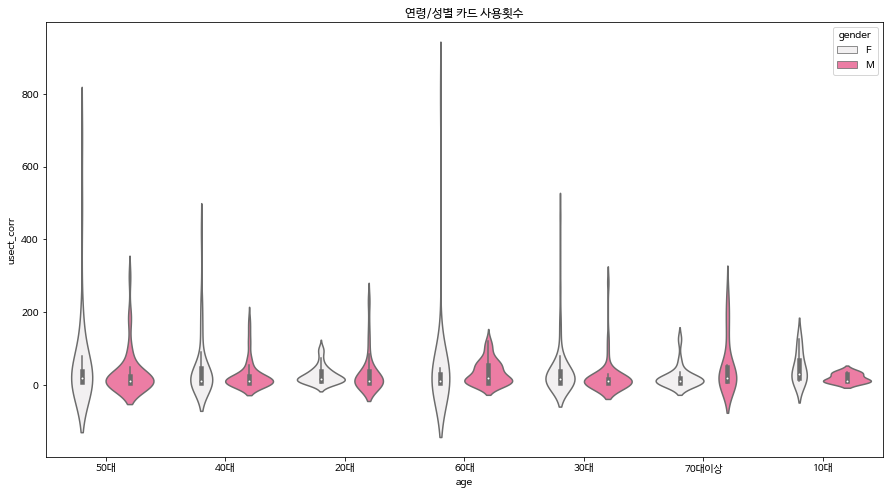

In [ ]:
#10대 확실히 사용 횟수가 제한적이다.
#50대와 60대의 카드 사용횟수 variation이 넓다
plt.figure(figsize = (15,8))
plt.title("연령/성별 카드 사용횟수")
sns.violinplot(data=df, x="age", y='usect_corr', hue="gender", split=False, color="#ff6a9e")
plt.show()

# 연령별 고가상품구매율 및 구매단가

다음으론 카드를 **누가 , 왜 많이 사용하는지**가 궁금하여 만든 **구매단가(price)**를 통해 여러 분석을 시도했습니다.    

이과정에서 구매단가(price) 와 고가상품구매율 이라는 두가지 feature가 생성되었습니다.  


1. 먼저 구매단가를 설명하자면,   
이는 **얼마나 비싼 상품을 구매할 의향이 있는지**를 알려줍니다.   
예를들어 어떤 고객의 Price 값이 높을 수록 그 고객이 구매한 해당 품목에 높은 가격을 지불할 용의가 있다는 것입니다.

2. 고가상품구매율은 구해진 구매단가에 대한 4분위수 계산하여 3Q 이상을 고가상품으로 설정하고 이에 따라 고가상품을 구매한 사람은 1로 그 외는 0 으로 표시합니다.   



막대그래프와 산점도를 통해 시각화한 고가상품구매율과 구매단가 를 살펴보니
1. **40대**에 상대적으로 고가상품을 구매하는 사람이 많았습니다. 
2. 고가상품구매에 가장 소극적인 연령은 **70대**입니다.

이는 상대적으로 다른 연령대에 비해 안정되고 가정이 있는 경우가 많은 40대가 고가상품을 구매하는 경우가 많음으로 분석했습니다.

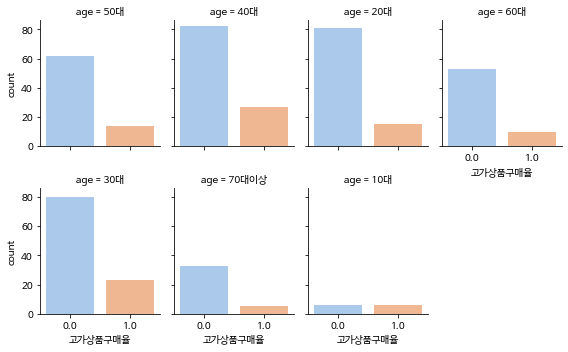

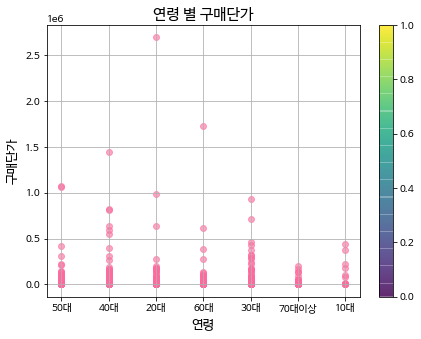

In [ ]:
#구매단가피쳐
df["price"]=df["amt_corr"]/df["usect_corr"]

# 상품별 평균 구매단가에 대한 4분위수 계산 => 3Q 이상을 고가상품으로 설정
price_4q = df.groupby('class1')['price'].mean().quantile([.25,.5,.75])

f = (df.reset_index().groupby('index')['price'].agg([('고가상품구매율', lambda x: (x > price_4q.iloc[2]).mean().round(2))])
     .reset_index(drop=True))

df = pd.concat([df,f], axis=1)#고가 상품 구매율 피쳐 추가

#고가상품구매율
sns.catplot(data=df, x="고가상품구매율", kind="count", col="age", 
            col_wrap=4, height=2.5, aspect=.8,palette=color)
plt.show()

#구매단가
plt.figure(figsize=(7,5))
plt.title("연령 별 구매단가", fontsize=15)
plt.scatter(df["age"], df["price"], alpha=.6, color='#ff6a9e')
plt.xlabel("연령", fontsize=13)
plt.ylabel("구매단가", fontsize=13)
plt.grid()
plt.colorbar()
plt.show()

# 성별 고가상품구매율
다음은 성별로 고가상품구매율을 분석해보겠습니다.

성별로 고가상품을 구매한 사람 수를 따져보니 남성이 여성보다 살짝 높지만 그 차이가 크지는 않습니다. 

<Figure size 1080x576 with 0 Axes>

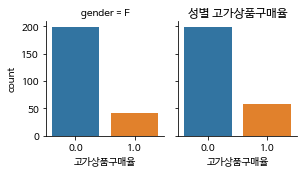

In [ ]:
plt.figure(figsize = (15,8))
sns.catplot(data=df, x="고가상품구매율", kind="count", col="gender", 
            col_wrap=4, height=2.5, aspect=.8)

plt.title("성별 고가상품구매율")
plt.show()

# 성별 구매단가
하지만 성별로 구매한 상품의 단가 를 시각화 해보니   
남성이 여성보다 값이 비싼 물건을 구매하는 경우가 많았습니다.

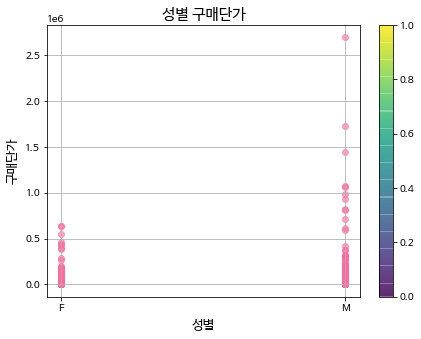

In [ ]:
plt.figure(figsize=(7,5))
plt.title("성별 구매단가", fontsize=15)
plt.scatter(df["gender"], df["price"], cmap='coolwarm', alpha=.6,  color='#ff6a9e')
plt.xlabel("성별", fontsize=13)
plt.ylabel("구매단가", fontsize=13)
plt.grid()
plt.colorbar()
plt.show()

그럼 대체 어느 품목에서 고가상품을 구매하는것일까요?
# 품목별 고가상품구매율
품목별 고가상품구매율을 시각화해본 결과
고가상품의소비가 가장 많은 품목은 **요식/유흥 그리고 유통** 이였습니다.


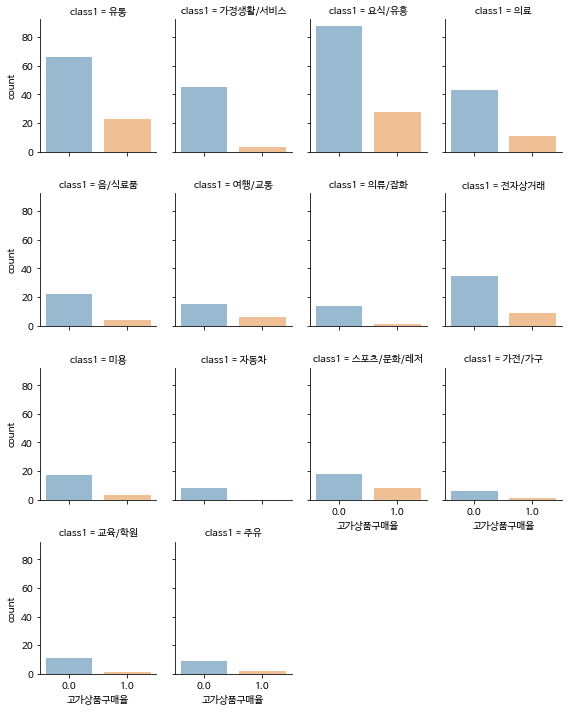

In [ ]:
sns.catplot(data=df, x="고가상품구매율", kind="count", col="class1", 
            col_wrap=4, height=2.5, aspect=.8, alpha=0.5)

plt.show()

요식 / 유흥의 소분류를 분석하여 구체적으로 어느 상품에서의 고가상품을 구매하는지 들여다 보았습니다. 

# 요식/유흥에서의 고가상품구매율
요식/유흥의 소분류 고가상품구매율을 시각화 해보았습니다.

우리가 자주 먹는 **한식/기타요식/중식**에서의 고가상품소비가 두드러졌습니다. 역시나 **돈을 쓴다면 먹는데엔 돈을 아끼지 않네요** 

그런데 재미있는 특이한 점을 찾았습니다   
뒤이어 등장한 것이 일식 양식도 아닌 **커피전문점**(?)이였습니다.. 

역시 커피값이 금값이라 해도 엄청나게 마시는것 같습니다. 저 또한 밥값만큼 커피값에 쓰는것 같습니다.

 그럼 커피전문점의 주요 고객은 누구였을까요? 

Text(0.5, 1.0, '요식/유흥에서의 고가상품소비')

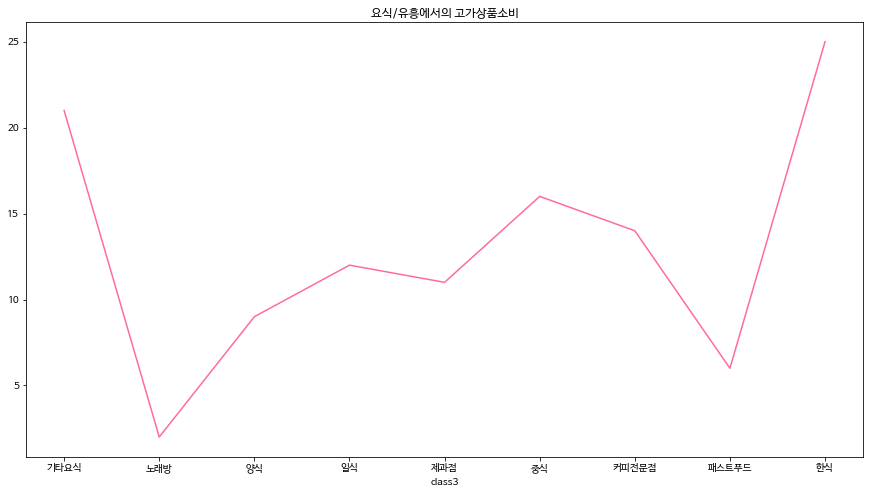

In [ ]:
plt.figure(figsize = (15,8))
df.query("class1 == '요식/유흥'").groupby("class3")['고가상품구매율'].count().plot(color='#ff6a9e')

plt.title("요식/유흥에서의 고가상품소비")

그 해답은 연령별 성별 카드 사용횟수비교를 통해 알수 있었습니다.
개인의 중복결제를 포함한 카드사용횟수를 성별로 비교해보았습니다.

# 성별 총 카드결제건수 비율
해당 값은 개인이 여러번 결제한 값을 중복제거하지 않고 그대로 사용한 값입니다.
즉 개인의 카드사용횟수를 모두 고려한것입니다.

시각화 결과 앞선 시각화를 통해 알아낸 카드사의 주요 소비자인 30,40,50 대 중 **유독 30대의 남녀 성비 차이**가 큽니다.

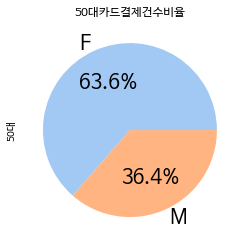

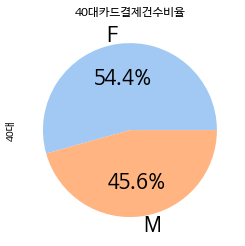

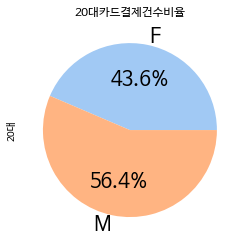

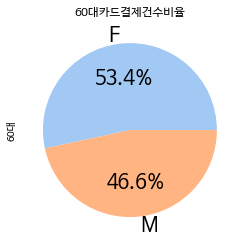

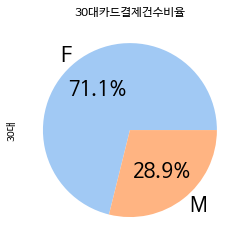

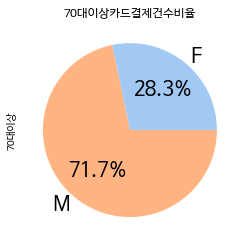

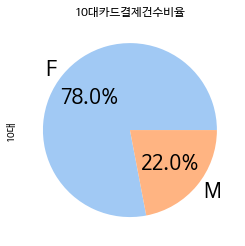

In [ ]:
age_pivot = pd.pivot_table(df, index="age", columns ="gender", values="usect_corr", aggfunc="sum" )
category = list(df["age"].unique())

for c in category :
    for indx in age_pivot.index:
        if indx==c :
            plt.title('{0}카드결제건수비율'.format(indx))
            age_pivot.loc[indx].plot(kind = 'pie', subplots=True,autopct='%1.1f%%',textprops= {'fontsize' : 20}, colors = color,figsize = (15,8))
            plt.show()

그래서 그 차이가 어느 품목에서 오는지 30대만 뽑아서 class3에서의 카드결제건수를 심층적으로 알아보았습니다.

# 30대 성별 카드결제건수
  
1. 30대 여성의 상품 소비건수는 **백화점, 커피전문점, 호텔**에서  

2. 30대 남성의 상품소비건수는 **기타요식, 병원,통신**에서 두드러지게 나타납니다.   

3. 그리고 **여성은 남성에 비해 커피전문점에서**의 거래건수가 많음이 보입니다.  

30대는 백화점 커피전문점 호텔에서의 결제 건수에서 남성과 여성의 차이가 두드러진것으로 분석됩니다.


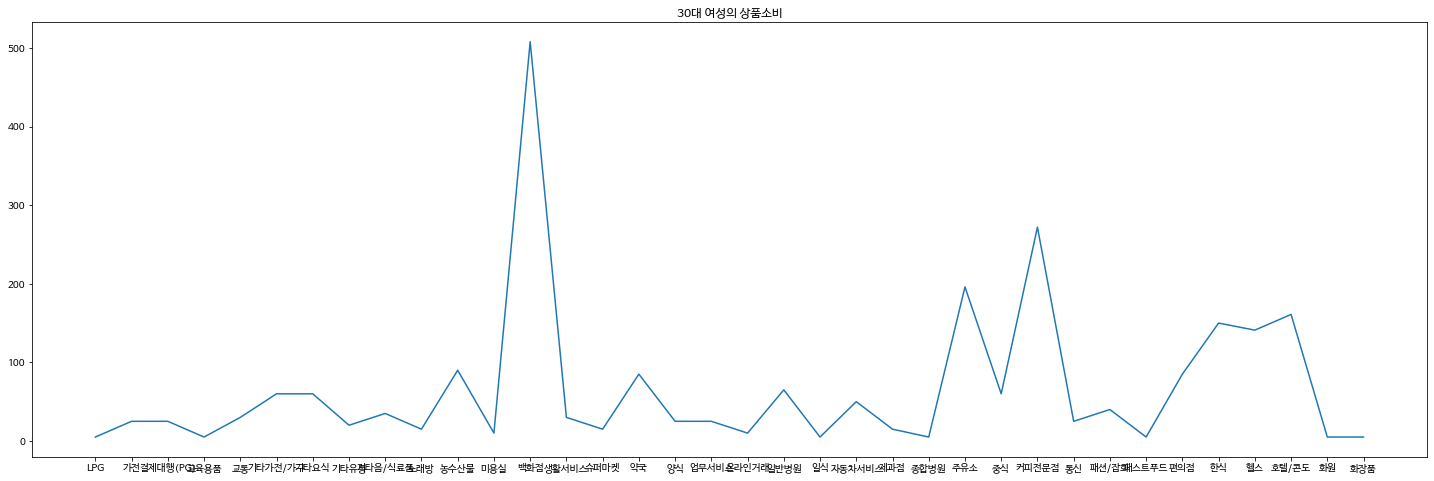

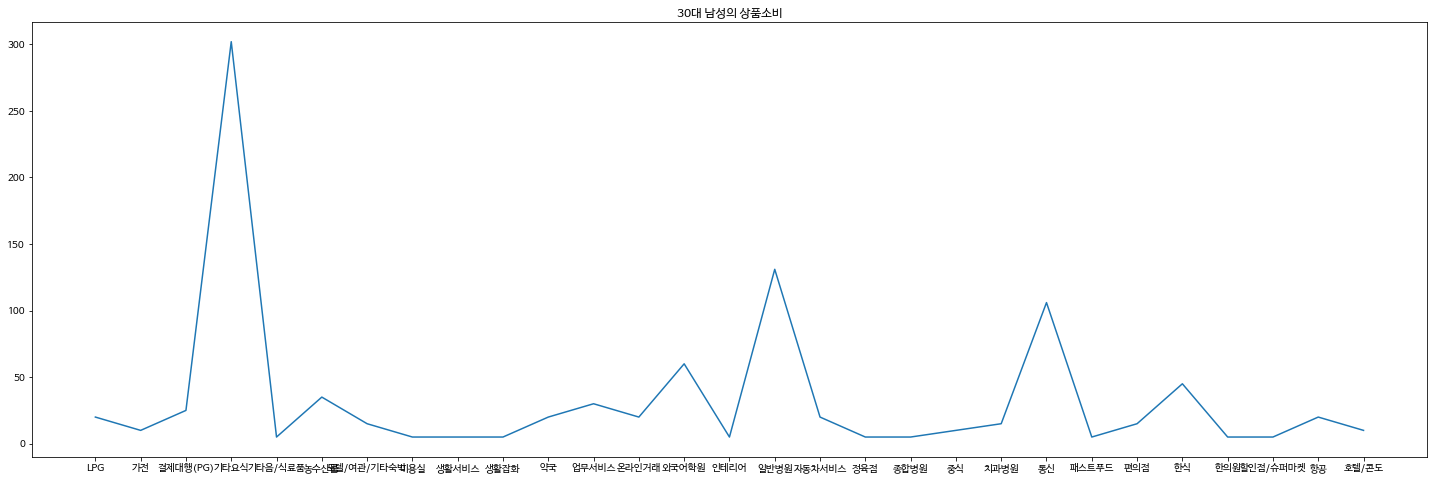

In [ ]:
plt.figure(figsize = (25,8))
a = df.query("age == '30대' and gender =='F'").groupby("class3")['usect_corr'].sum()
plt.title("30대 여성의 상품소비")
plt.plot(a)



plt.figure(figsize = (25,8))
b = df.query("age == '30대' and gender =='M'").groupby("class3")['usect_corr'].sum()
plt.title("30대 남성의 상품소비")
plt.plot(b)

다음은 업종을 중심으로 분석을 해보겠습니다. 
# 업종별 카드이용건수
업종별 카드 이용건수(단순히 사람들이 가장 많이 찾는 품목)이 뭐인지 분석해본 결과  
**요식/유흥, 유통, 의료**순이였습니다.  


이를 성별로 나누어보니 여성과 남성의 구매횟수는 서로 비슷했습니다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1525e27250>,
      dtype=object)

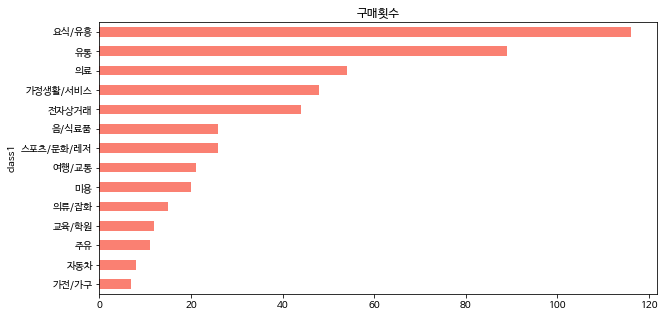

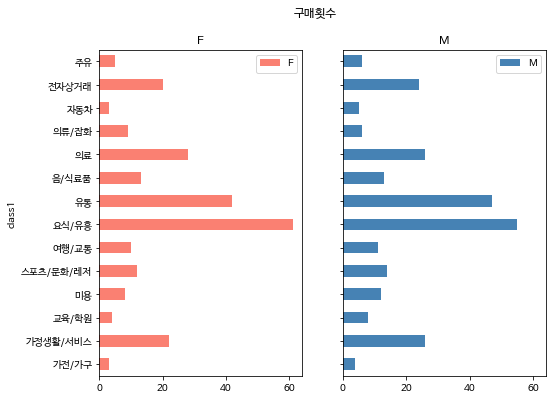

In [ ]:
#구매횟수
plt.figure(figsize = (10,5))
df.groupby('class1').size().sort_values(ascending=True).plot(kind='barh',color = ['salmon'], title = "구매횟수")
#성별 구매횟수
pivot_purecnt =pd.pivot_table(df, index="class1", columns ="gender", values="usect_corr", aggfunc="size" )
pivot_purecnt.plot(kind ='barh', title = "구매횟수",sharey=True, subplots=True, layout=(1,2), figsize=(8,6), color= ['salmon','steelblue'])


# 업종별 구매단가
업종별 구매단가를 통해 금액지불용의가 어디에서 높은지를 알아보았습니다.

단가는 유통, 여행/교통, 전자상거래 순이였고 각각의 소분류는 아래와 같습니다.

1. 유통 : 할인점/슈퍼마켓', '편의점', '슈퍼마켓', '기타유통', '백화점', '생활잡화'  
2. 여행/교통 :  '호텔/콘도' '교통' '항공' '면세점' '모텔/여관/기타숙박'   
3. 전자상거래 : '결제대행(PG)' '온라인거래' '홈쇼핑'  

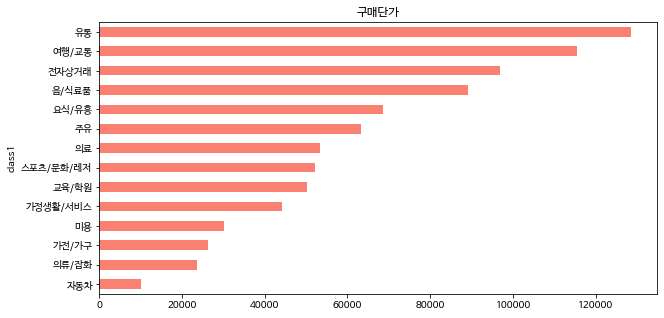

In [ ]:
#구매단가
plt.figure(figsize = (10,5))
df.groupby('class1')['price'].mean().sort_values(ascending=True).plot(kind='barh',color = ['salmon'],title = '구매단가')

In [ ]:
print(df.query("class1 == '유통'").class3.unique())
print(df.query("class1 == '여행/교통'").class3.unique())
print(df.query("class1 == '전자상거래'").class3.unique())

['할인점/슈퍼마켓' '편의점' '슈퍼마켓' '기타유통' '백화점' '생활잡화']
['호텔/콘도' '교통' '항공' '면세점' '모텔/여관/기타숙박']
['결제대행(PG)' '온라인거래' '홈쇼핑']


# 품목별/성별 평균구매단가
상품단가를 성별로 나누어 성별로 특정 품목에서의 지불용의를 알아보았습니다.
 
1. 여성은 남성에 비해  **교육/학원**에 비싸더라도 지불할 용의를 보이고  
2. 남성은 여성에 비해 **요식/유흥, 자동차, 음식료품, 전자상거래**에 비싸더라도 지불할 용의를 보입니다.

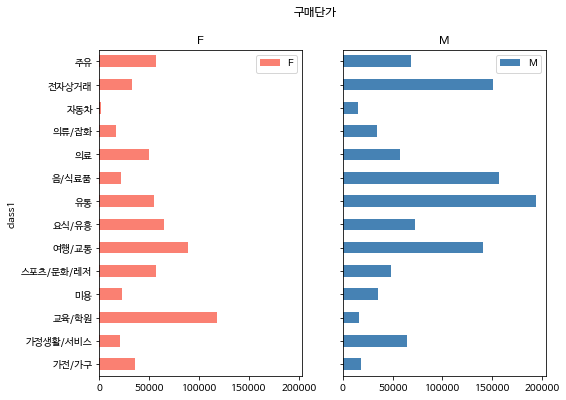

In [ ]:
# 업종별 상품 평균구매단가 (어디에 돈을 더 지출하는가?)
pivot_price=pd.pivot_table(df, index="class1", columns ="gender", values="price", aggfunc="mean", fill_value=0)
pivot_price.plot(kind ='barh', title = "구매단가",sharey=True, subplots=True, layout=(1,2), figsize=(8,6),color= ['salmon','steelblue'])
plt.show()

# 성별 평균소비금액 (총거래금액/총거래횟수)
그러면 평균적으로 여성은 어디에? 남성은 어디에 소비할까요? 성별 1회 평균 소비금액을 알아보았습니다.

1. 여성은 남성보다 **가전/가구, 의류/잡화, 주**유 에  
2. 남성은 여성보다  **자동차, 전자상거래, 음/식료품**에 평균적으로 소비금액이 높게 나타납니다.

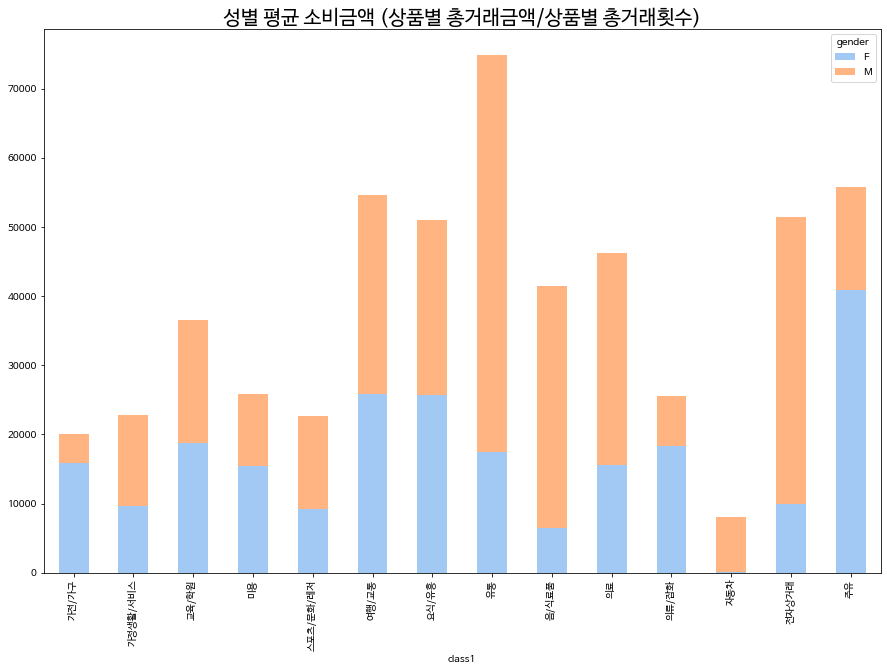

In [ ]:
#평균소비금액 (총거래금액/총거래횟수)
pivot_amt=pd.pivot_table(df, index="class1", columns ="gender", values="amt_corr", aggfunc="sum", fill_value=0)
pivot_cntsum =pd.pivot_table(df, index="class1", columns ="gender", values="usect_corr", aggfunc="sum" , fill_value=0)
pivot_avg =pivot_amt/pivot_cntsum
pivot_avg.plot(kind='bar', stacked=True, color=color, figsize=(15,10))
plt.title("성별 평균 소비금액 (상품별 총거래금액/상품별 총거래횟수)", fontsize=20)
plt.show()

# DF1 분석내용정리
### <연령별 카드이용고객수, 총이용건수, 이용금액합계>
카드이용고객수, 카드 총이용건수, 카드 이용금액 합계를 통해
어느 연령대에 고객이 많이 분포하는지와 카드를 많이 사용하는지를 알아보았다.  
경제활동이 활발한 **20~50대에 고객이 많고 카드사용건수, 이용금액도 높으며**
경제활동인구에 속하는 수가 적은 **10대와 70대 이상이 고객수, 카드사용건수, 이용금액 모두 낮았다**. 

### <연령별 카드사용의 분산>
카드 총이용건수와 이용금액합계의 연령/ 성별의 비중에서 유의미한 결과를 분석할 순 없었다.
그러나  연령대 안에서 카드사용의 분산을 알아본 결과 **50,60대 여성**이 그 분포가 넓게 나타났다.


다음으론 얼마나 비싼 상품을 구매할 의향이 있는지를 알려주는 구매단가(price)를 통해 여러 분석을 시도했다.
이와 더불어 고가상품구매율 이라는 feature를 생성하여 1은 고가상품을 구매한것 0은 아닌것으로 분류했다.

### <연령별 고가상품구매율과 구매단가>
연령별 고가상품구매율과 구매단가를 살펴본 결과 
**40대**에 상대적으로 고가상품을 구매하는 사람이 많았고 고가상품구매에 가장 소극적인 연령은 70대이다.  
이는 상대적으로 **다른 연령대에 비해 안정되고 가정이 있는 경우가 많은 40대**가 고가상품을 구매하는 경우가 많음으로 분석된다.
### <항목별고가상품구매율>
항목별 고가상품구매율을 살펴본 결과   
고가상품구매율이 높은 항목은 요식/유흥 그중에서도 **한식/기타요식/중식/커피전문점** 이였다.
돈을 쓴다면 먹는데엔 돈을 아끼지 않는다.  

연령별로 카드 총 이용건수를 분석한 결과 주요 카드이용고객인 30대의 성비가 매우 불균형하였다.     
30대는 백화점 커피전문점 호텔에서의 결제 건수에서 남성과 여성의 차이가 두드러졌다.

### <평균구매단가>

성별 평균적인 구매단가를 통해 성별로 특정 품목에 지불용의를 알아보았다.
평균적으로 여성은 남성보다 교육/학원에 비싸더라도 지불할 용의를 보이고
남성은 여성에 비해 요식/유흥, 자동차, 음식료품, 전자상거래에 비싸더라도 지불할 용의를 보인다.  

### <평균소비금액>

그리고 성별 평균소비금액을 통해 대체적으로 어느 품목에 소비하는지 비교해 본 결과 	여성은 남성보다 가전/가구, 의류/잡화, 주유에 남성은 여성보다 자동차, 전자상거래, 음/식료품에 평균적으로 소비금액이 높게 나타났다.

# DF2 : 시간대별소액결제건수 카드소비패턴

DF2는 시간대별소액결제건수 카드소비패턴 데이터입니다. **시간대별**로 데이터를 분석하였습니다.  


DF1과 DF2의 고객주소블록코드 (BLOCK_CD)가 겹치는지 확인해보았으나 겹치지 않는 데이터였습니다. 따라서 각 데이터들은 독립적으로 생각하고 분석을 진행을 하였습니다.


In [ ]:
#df1과 df2의 고객주소블록코드는 서로 다르다.
display(df2[df2['block_cd']==11063])
display(df1[df1['block_cd'] == 11063])

# 고객주소블록코드가 겹치지 않는다.
df1L = set(df1.block_cd.unique())
df2L = set(df2['block_cd'].unique())

,upjong_cd,ym,time,block_cd,amt_corr,micro_pym
0,SS017,202006,6,11063,257,25


,upjong_cd,ym,block_cd,gender,age,amt_corr,usect_corr


DF5와 upjong_cd를 기준으로 병합하는 과정을 거쳤습니다.

In [ ]:
df_2 = pd.merge(df2,df5, on="upjong_cd")
df_2 = df_2.drop(['upjong_cd'],axis=1)
df_2

,ym,time,block_cd,amt_corr,micro_pym,class1,class2,class3
0,202006,6,11063,257,25,유통,기타유통,기타유통
1,202012,3,219861,10,0,유통,기타유통,기타유통
2,201903,6,10651,20,55,유통,기타유통,기타유통
3,202009,1,148754,106,5,유통,기타유통,기타유통
4,201601,6,204110,5,5,유통,기타유통,기타유통
...,...,...,...,...,...,...,...,...
495,201908,3,208885,10,0,여행/교통,숙박,모텔/여관/기타숙박
496,201603,4,229328,5,0,교육/학원,학원,입시보습학원
497,202012,5,211996,10,0,유통,할인점/슈퍼마켓,슈퍼마켓
498,202105,3,220999,5,0,유통,할인점/슈퍼마켓,슈퍼마켓


# 전처리
1시 ~ 2시 (점심)  
3시 ~ 4시 (낮)   
5시 ~ 6시 (저녁)으로 
시간을 범주로 나누어 피쳐를 추가해주었습니다

In [ ]:
#1시~2시 (점심), 3시~4시 (낮), 5시~6시 (저녁)
size=len(df_2)
time_class={"구매시간(범주)":[]}

for i in range(size):
    if 1<=df_2["time"][i]<=2 : 
        time_class["구매시간(범주)"].append("점심(1시,2시)")
    elif 3<=df_2["time"][i]<=4:
        time_class["구매시간(범주)"].append("낮(3시,4시)")
    elif 5<=df_2["time"][i]<=6:
        time_class["구매시간(범주)"].append("저녁(5시,6시)")
        
time_class_df=pd.DataFrame(time_class)
df_2=pd.concat([df_2,time_class_df],axis=1)
df_2

,ym,time,block_cd,amt_corr,micro_pym,class1,class2,class3,구매시간(범주)
0,202006,6,11063,257,25,유통,기타유통,기타유통,"저녁(5시,6시)"
1,202012,3,219861,10,0,유통,기타유통,기타유통,"낮(3시,4시)"
2,201903,6,10651,20,55,유통,기타유통,기타유통,"저녁(5시,6시)"
3,202009,1,148754,106,5,유통,기타유통,기타유통,"점심(1시,2시)"
4,201601,6,204110,5,5,유통,기타유통,기타유통,"저녁(5시,6시)"
...,...,...,...,...,...,...,...,...,...
495,201908,3,208885,10,0,여행/교통,숙박,모텔/여관/기타숙박,"낮(3시,4시)"
496,201603,4,229328,5,0,교육/학원,학원,입시보습학원,"낮(3시,4시)"
497,202012,5,211996,10,0,유통,할인점/슈퍼마켓,슈퍼마켓,"저녁(5시,6시)"
498,202105,3,220999,5,0,유통,할인점/슈퍼마켓,슈퍼마켓,"낮(3시,4시)"


시간별 소액결제이용고객수/ 시간별 소액결제평균금액을 알아보습니다.  

# 시간별 소액결제이용고객수
전체적으로 **3,4시 (낮)**에 소액결제이용고객수가 가장 많고 다음으론 저녁(5시,6시), 점심(1시,2시) 순이었습니다.

# 시간별 소액결제평균금액
그러나 소액결제 평균구매액을 살펴보니 **6시에 평균금액이 가장 높았고**범주로 봤을 때도 저녁의 평균금액이 낮과 거의 차이가 없을 정도로 높습니다.  

이는 **저녁에 고객수는 적지만 한명이 결제하는 건수가 많거나** **그 액수가 큰것**일 것으로 추측이 됩니다.

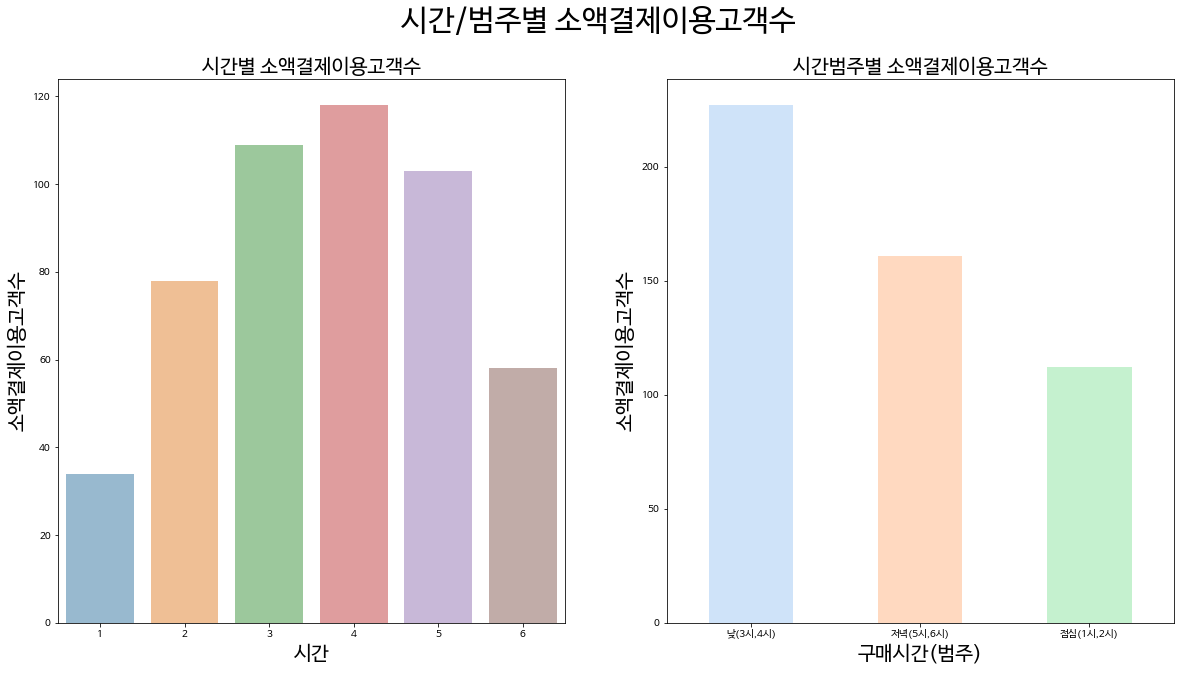

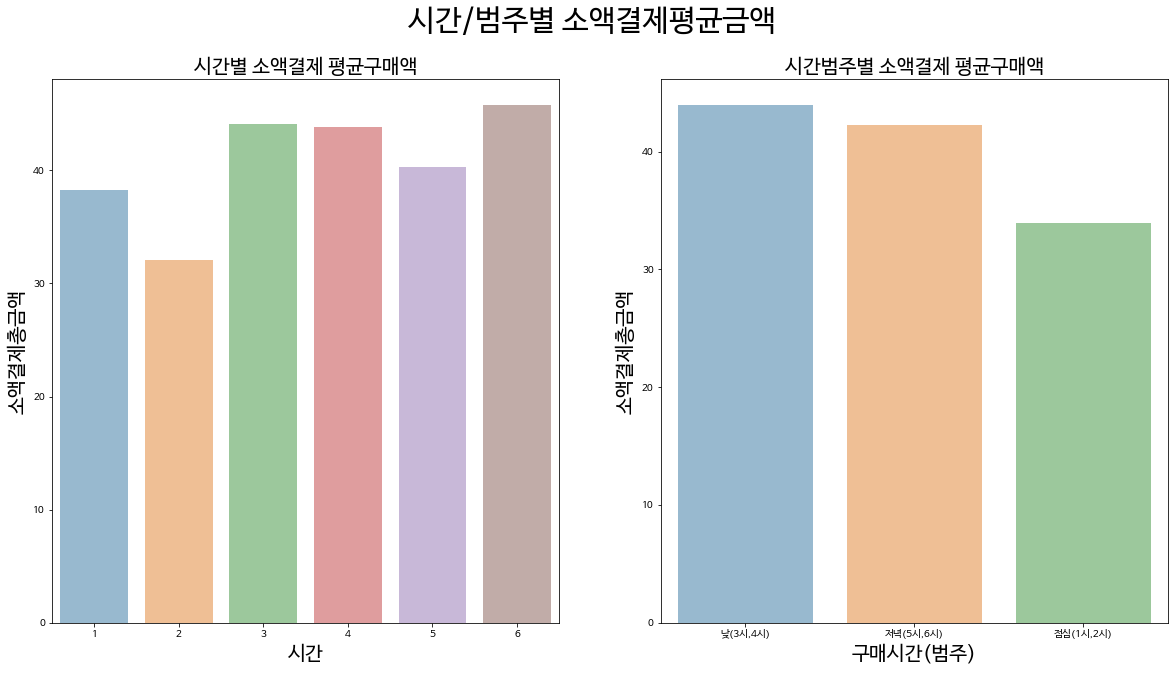

In [ ]:
#소액결제이용고객수
plt.figure(figsize = (20, 10))
plt.title("시간/범주별 소액결제이용고객수", fontsize=20)

plt.subplot(1,2,1)
plt.title("시간별 소액결제이용고객수", fontsize=20)

sns.countplot(x='time', data=df_2, alpha=0.5)  #소액결제이용고객수
plt.xlabel('시간', fontsize=20)
plt.ylabel('소액결제이용고객수',fontsize=20)

plt.subplot(1,2,2)
plt.title("시간범주별 소액결제이용고객수",fontsize=20)

df_2['구매시간(범주)'].value_counts().sort_index().plot(kind='bar', alpha=0.5, color = color)
plt.xticks(rotation= 0)
plt.xlabel('구매시간(범주)', fontsize=20)
plt.ylabel('소액결제이용고객수',fontsize=20)



plt.suptitle('시간/범주별 소액결제이용고객수', fontsize = 30)
plt.show()


#시간별 카드이용고객수, 총구매액, 평균금액
f1_1=df_2.groupby("time")["amt_corr"].agg([('평균구매액',np.mean), ("총구매액",np.sum)]).reset_index()
f1_2=df_2.groupby("구매시간(범주)")["amt_corr"].agg([('평균구매액',np.mean), ("총구매액",np.sum)]).reset_index()

plt.figure(figsize = (20, 10))
plt.title("시간/범주별 소액결제총금액", fontsize=20)

plt.subplot(1,2,1)
plt.title("시간별 소액결제 평균구매액",fontsize=20)
sns.barplot(data=f1_1, x="time", y="평균구매액", alpha=0.5) #평균구매액

plt.xlabel('시간', fontsize=20)
plt.ylabel('소액결제총금액',fontsize=20)

plt.subplot(1,2,2)
plt.title("시간범주별 소액결제 평균구매액", fontsize=20)
sns.barplot(data=f1_2, x="구매시간(범주)", y="평균구매액", alpha=0.5)
plt.xlabel('구매시간(범주)', fontsize=20)
plt.ylabel('소액결제총금액',fontsize=20)

plt.suptitle('시간/범주별 소액결제평균금액', fontsize = 30)
plt.show()

소액결제 총구매액을 통해 소액결제이용고객수와 비교해보니 **저녁에 소액결제건수대비 총금액이 높음**을 확인하였습니다.
즉, 저녁에 **단가가 높은 품목에서의 거래**가 있다는 것입니다.

*(이 품목이 무엇인지는 아래의 시간범주별/업종별 소액결제평균금액에서 알아보았습니다)*

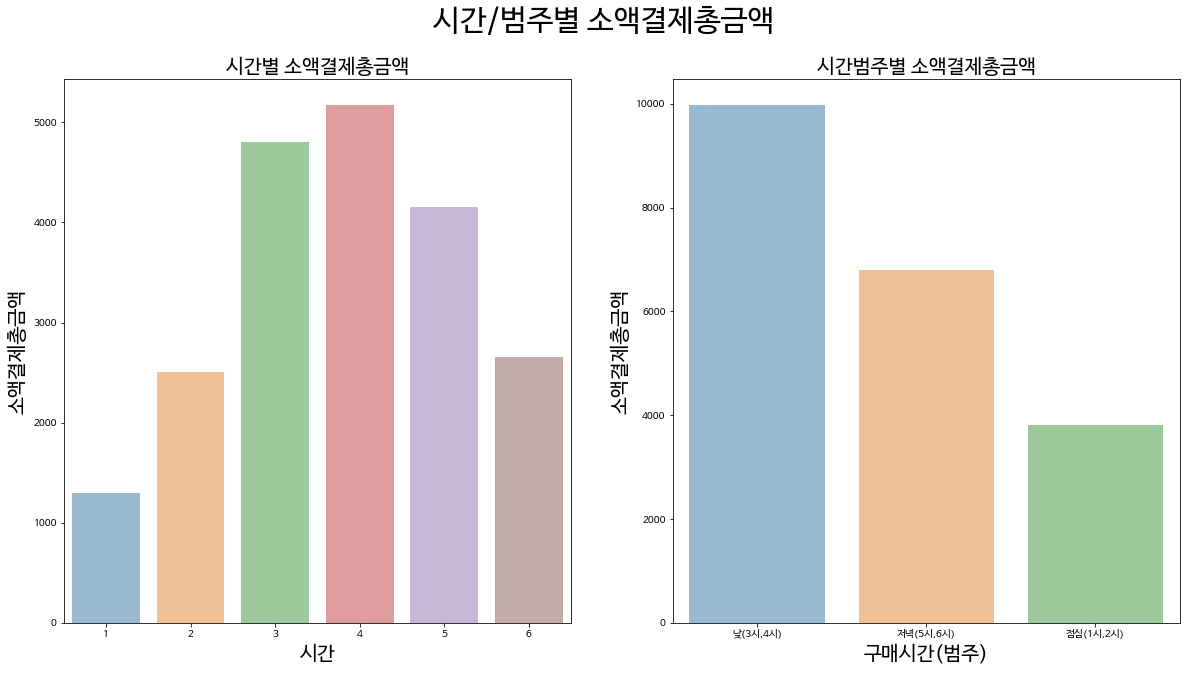

In [ ]:
#시간별 총구매액

plt.figure(figsize = (20, 10))
plt.title("시간/범주별 소액결제총금액", fontsize=20)

plt.subplot(1,2,1)
plt.title("시간별 소액결제총금액", fontsize=20)
sns.barplot(data=f1_1, x="time", y="총구매액", alpha=0.5) #총구매액
plt.xlabel('시간', fontsize=20)
plt.ylabel('소액결제총금액',fontsize=20)

plt.subplot(1,2,2)
plt.title("시간범주별 소액결제총금액", fontsize=20)
sns.barplot(data=f1_2, x="구매시간(범주)", y="총구매액", alpha=0.5)
plt.xlabel('구매시간(범주)', fontsize=20)
plt.ylabel('소액결제총금액',fontsize=20)

plt.suptitle('시간/범주별 소액결제총금액', fontsize = 30)
plt.show()

그럼 범주별로 나눠서 시간에 따라 도대체 어떤 품목이 많이 소비되고 비싸게 소비되는지 알아보겠습니다.

# 시간범주별 품목별 소액결제 건수 
heatmap을 통해 **시간범주별 소액결제 건수**를 살펴보았습니다.
색이 옅어질수록 그 건수가 많다는 것을 의미합니다.
heatmap을 보면 **낮 그리고 저녁에 요식/유흥의 소액결제건수가 많음**을 알 수 있고 이는 다른 품목들에 비해 압도적으로 높게 나타남이 확인됩니다.


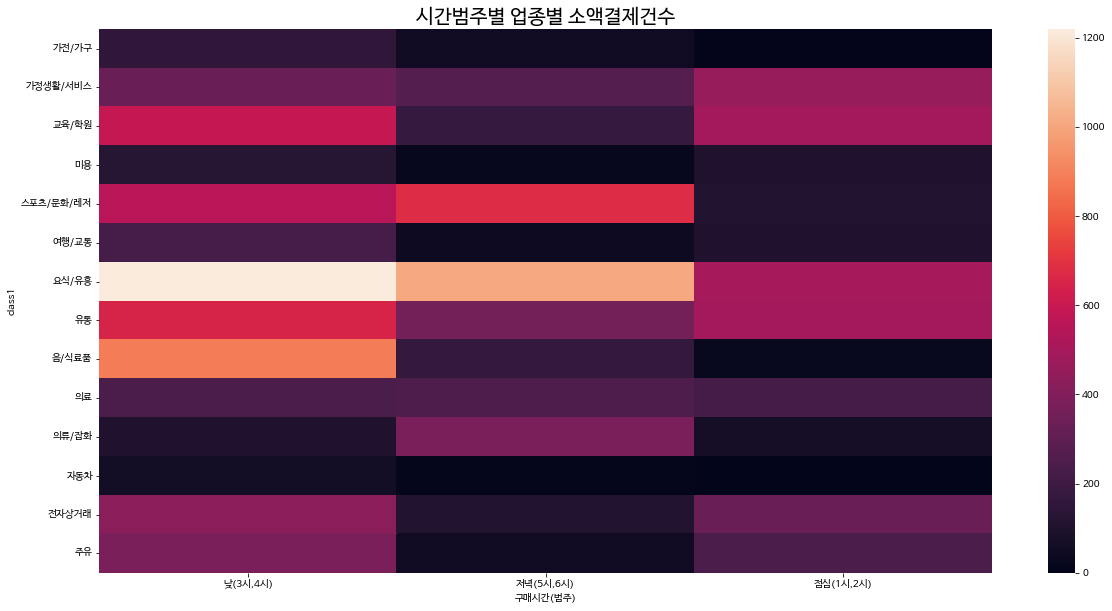

In [ ]:
#시간범주별 업종별 소액결제건수
timeset_df=pd.pivot_table(df_2, index="class1", columns ="구매시간(범주)", values="micro_pym", aggfunc="sum" ,fill_value=0)


plt.figure(figsize = (20, 10))
plt.title("시간범주별 업종별 소액결제건수",fontsize=20)
sns.heatmap(timeset_df)
plt.show()



# 시간범주별/업종별 소액결제평균금액
다음으로 시간범주별/업종별 평균금액을 살펴보았습니다.
소비의 평균금액이 가장 높은 것은 저녁(5시,6시)의 자동차와 주유입니다.    

주유와 자동차라니 살짝 놀랐습니다; 

하지만 생각해보니 워낙 주유에 많은 돈이 들기 때문에 평균소비금액이 높게 나오고 보통 하루일과를 마치고 귀가하면서 주유하는 경우가 많아서 이런 결과가 나온 것 같습니다.     
따라서 **소액결제건수 자체는 적은데 단가가 높기때문에 많은 사람들이 주유하지 않아도 높게 나오는 것으로 분석**했습니다.

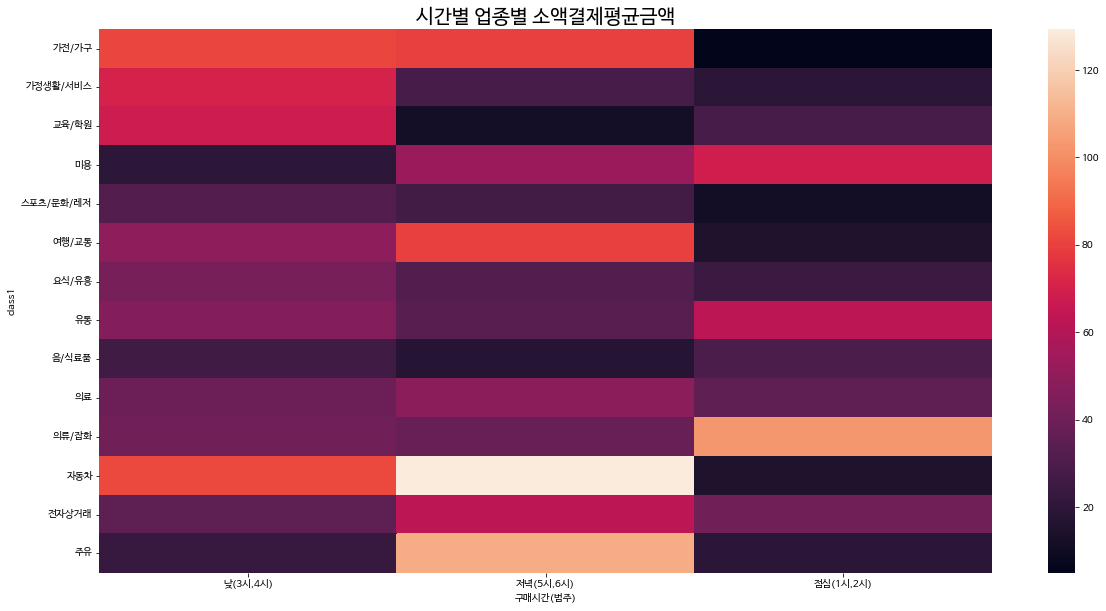

In [ ]:
#시간범주별 업종별 소액결제평균금액
timeset_df2=pd.pivot_table(df_2, index="class1", columns ="구매시간(범주)", values="amt_corr", aggfunc="mean" ,fill_value=0)
plt.figure(figsize = (20, 10))
plt.title("시간별 업종별 소액결제평균금액",fontsize=20)
sns.heatmap(timeset_df2)
plt.show()

대분류인 '자동차'는 대체 무엇을 의미하는 것인지 감이 잡히질 않아서 자동차의 소분류를 기준으로 평균금액을 살펴보았습니다.   

시각화를 하고 보니 자동차 서비스가 높은 비중을 차지합니다.

(주유소에서 주유도하고 자동차 서비스도 받는것(?)으로 추측했습니다)

Text(0.5, 1.0, '저녁(5시,6시) 자동차에서의 소비')

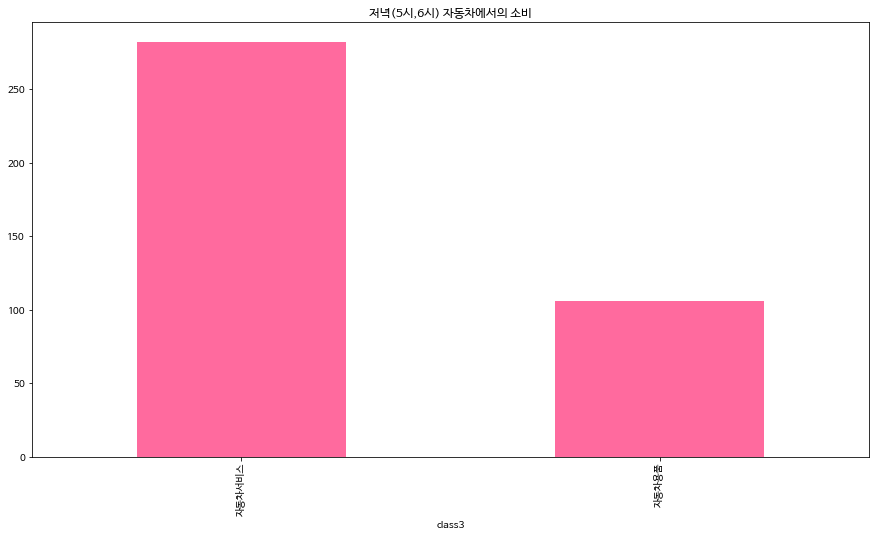

In [ ]:
plt.figure(figsize = (15,8))
df_2.query("time == 5 or time ==6").query("class1 == '자동차'").groupby("class3")['amt_corr'].sum().plot(kind='bar',color='#ff6a9e')
plt.title("저녁(5시,6시) 자동차에서의 소비")

# DF2 분석내용정리


소액결제를 사용하는 고객은 낮시간(3시,4시)이 가장 많았고 점심시간(1시,2시)이 가장 적었다.

하지만 소액결제에 사용하는 평균 금액자체는 저녁 (5시,6시)가 가장 높았고 시간대로 보면 낮시간 저녁시간이 순이였다.

따라서 시간별로 소액결제 총금액과 이용고객을 비교해보니 6시에 고객수 대비 총금액이 높다는것이 확인 되었다.


6시에 뭘하나 평균금액분포를 분석해보니 저녁시간 자동차와 주유에서의 소비가 제일 높게 나왓다.

자동차는 자동차서비스였다.

귀갓길에 주유소에 들러 많은 사람은 아니지만 소액결제 치고는 높은금액을 쓴다는걸 확인할수있다.

그리고 역시나 요식/유통의 건수가 전체를 통틀어 특히 낮시간에 소비가 가장 많았다.

# DF3 : 일별 소비지역별 카드소비패턴


다음으로 DF3을 살펴보겠습니다.
DF3은 소비지역별 카드소비패턴 데이터이기 때문에 소비지역에 집중해서 분석했습니다.


# 전처리

분석에 앞서 지역명 전처리를 먼저 진행하였습니다.
광역시도와 시군구의 매칭이 잘못된 경우가 상당수 발견되었습니다.
(예를들어 서울 남양주시)
따라서 서울,경기,인천을 각각의 시군구와 매칭시켜주는 작업을 거쳤습니다.



In [ ]:
#지역 전처리
# sgg와 시도가 맞지 않다.
# sgg기준으로 시도에 맞추는 작업 진행
SL = ['강남구','서대문구', '종로구', '서초구','영등포구', '송파구','용산구', '양천구', '마포구', '성북구','금천구','광진구','강서구','동작구', '성동구', '중구','은평구',"관악구","노원구","광진구","중랑구","구로구",'강동구','도봉구','동대문구','강북구']
GL = ['파주시','고양시','성남시','광명시','화성시','안양시','양평군','구리시','용인시','수원시','시흥시','안산시','이천시','의정부시','양주시','부천시','강화군','하남시','오산시','가평군','광주시','김포시','평택시']
IL = ['남동구','부평구','연수구','옹진군']

print(len(SL + GL + IL))
#서울
for i in range(len(df_3)):
    if df_3.loc[i]["sgg"] in SL and df_3.loc[i]["sido"] != "서울":
        df_3.loc[i] = df_3.loc[i].replace(df_3.loc[i]['sido'],'서울')

#경기
for i in range(len(df_3)):
    if df_3.loc[i]["sgg"] in GL and df_3.loc[i]["sido"] != "경기":
        df_3.loc[i] = df_3.loc[i].replace(df_3.loc[i]['sido'],'경기')
#인천
for i in range(len(df_3)):
    if df_3.loc[i]["sgg"] in IL and df_3.loc[i]["sido"] != "인천":
        df_3.loc[i] = df_3.loc[i].replace(df_3.loc[i]['sido'],'인천')
df_3

53


,sido,sgg,class1,ymd,tot_reg_cd,amt_corr,usect_corr
0,서울,강남구,전자상거래,20201021,1123077020119,251500,25
1,서울,관악구,요식/유흥,20170312,1112052010107,158445,20
2,서울,마포구,주유,20161205,1113068050004,8048,15
3,서울,동작구,의료,20201210,1105066020601,22635,5
4,서울,NaN,가정생활/서비스,20210216,1117052020001,65390,10
...,...,...,...,...,...,...,...
495,서울,종로구,가전/가구,20201108,1120055030005,55330,10
496,인천,부평구,의료,20180901,1122058020102,853591,5
497,서울,강남구,유통,20160326,1123064020008,2052240,5
498,서울,서초구,스포츠/문화/레저,20160804,1124061010014,22635,5


# 이상치제거
이상치를 제거하는 과정을 거쳤습니다.  
이상치의 기준은 카드이용금액계(AMT_CORR)와 카드이용건수계(USECT_CORR)를 boxplot으로 시각화하여 지나치게 튀는 값들은 제거해 주었습니다.

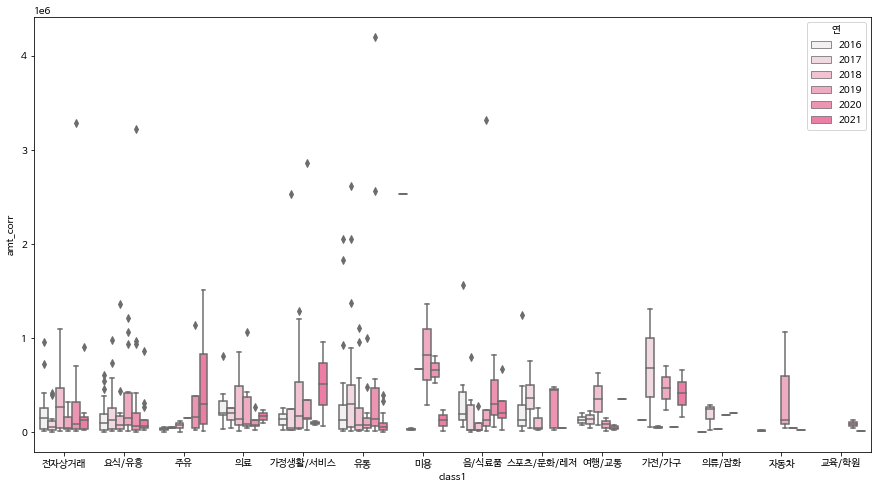

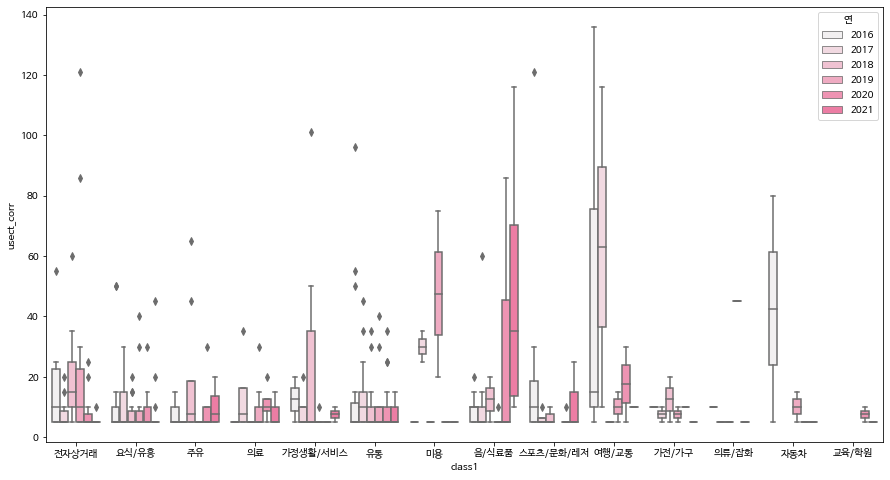

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(data=df_3, x="class1", y="amt_corr", hue="연",color= '#ff6a9e')
plt.show()

plt.figure(figsize = (15,8))
sns.boxplot(data=df_3, x="class1", y="usect_corr", hue="연",color= '#ff6a9e')
plt.show()

이상치는 아래와 같습니다.
유통, 요식/유흥 에서 이상치가 발견되어 아래 8개의 데이터는 제거하였습니다.

In [ ]:
print(df_3.query("class1 == '유통'")["amt_corr"].sort_values(ascending = False).index[0])
print(df_3.query("class1 == '유통'")["amt_corr"].sort_values(ascending = False).index[1])
print(df_3.query("class1 == '요식/유흥'")["amt_corr"].sort_values(ascending = False).index[0])
print(df_3.query("class1 == '요식/유흥'")["amt_corr"].sort_values(ascending = False).index[1])
print(df_3.query("class1 == '유통'")["usect_corr"].sort_values(ascending = False).index[0])
print(df_3.query("class1 == '유통'")["usect_corr"].sort_values(ascending = False).index[1])
print(df_3.query("class1 == '요식/유흥'")["usect_corr"].sort_values(ascending = False).index[0])
print(df_3.query("class1 == '요식/유흥'")["usect_corr"].sort_values(ascending = False).index[1])

261
332
72
80
359
244
61
79


최종적으로 총 492건의 데이터를 이용하여 분석을 시작하였습니다.

In [ ]:
df_3 = df_3.drop(index=[261,332,72,80,359,244,61,79])
df_3.reset_index(drop=True, inplace=True)
df_3

,sido,sgg,class1,ymd,tot_reg_cd,amt_corr,usect_corr
0,서울,강남구,전자상거래,20201021,1123077020119,251500,25
1,서울,관악구,요식/유흥,20170312,1112052010107,158445,20
2,서울,마포구,주유,20161205,1113068050004,8048,15
3,서울,동작구,의료,20201210,1105066020601,22635,5
4,서울,NaN,가정생활/서비스,20210216,1117052020001,65390,10
...,...,...,...,...,...,...,...
487,서울,종로구,가전/가구,20201108,1120055030005,55330,10
488,인천,부평구,의료,20180901,1122058020102,853591,5
489,서울,강남구,유통,20160326,1123064020008,2052240,5
490,서울,서초구,스포츠/문화/레저,20160804,1124061010014,22635,5


# 지역별 카드이용고객수
먼저 지역별 카드이용고객수를 살펴보았습니다.  
**서울, 경기, 인천(수도권)** 순으로 카드이용고객수가 많음을 확인할 수 있습니다.

Text(0.5, 1.0, '지역별 카드이용고객수')

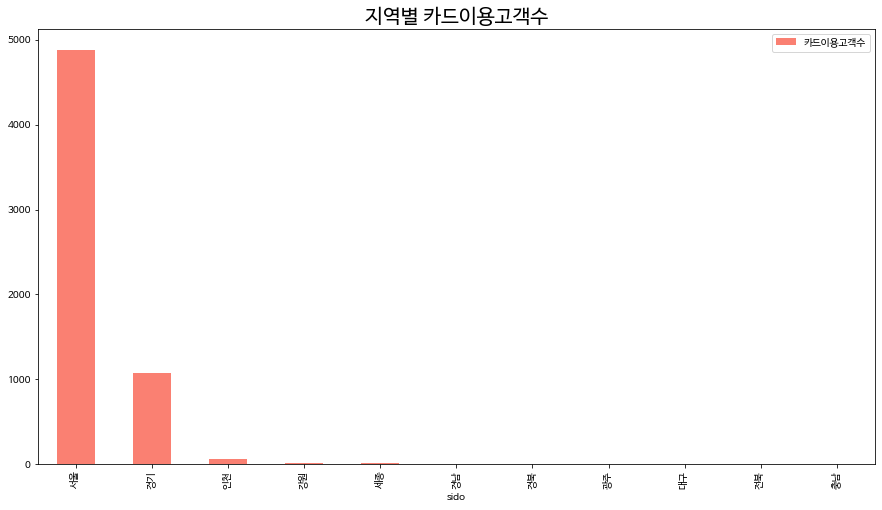

In [ ]:
#카드이용고객수
new_all_df=pd.DataFrame(df_3.groupby(["sido"]).usect_corr.sum()).rename({"usect_corr":"카드이용고객수"},axis=1)

new_all_df.sort_values(by=['카드이용고객수'], ascending=False).plot(kind='bar', figsize = (15,8),color = 'salmon')
plt.title("지역별 카드이용고객수", fontsize=20)

# 카드이용고객수 상위 세곳
카드이용고객수 (지역별 순 거래량)상위 세 지역을 확인해보았습니다.  
상위 세 지역은 
1.**서울 중구**
2.**서울 마포구**
3.**서울 강남구**
였고 각각의 품목도 살펴보았습니다. 

세 지역은 공통적으로 **유통과 요식/유흥**의 거래비중이 가장 높았고
독특하게 **중구는 의료**가
**마포구는 음/식료품**이
**강남구는 전자상거래**가 뒤를 이었습니다.

[['중구', '마포구', '강남구']]


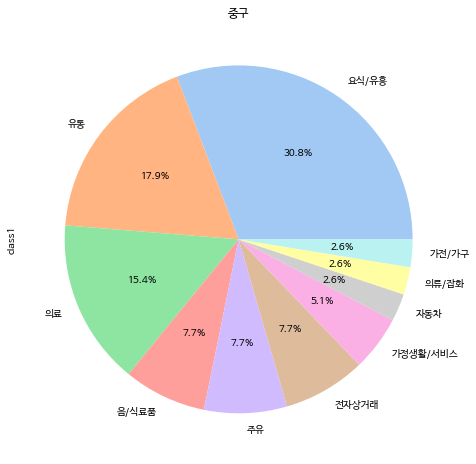

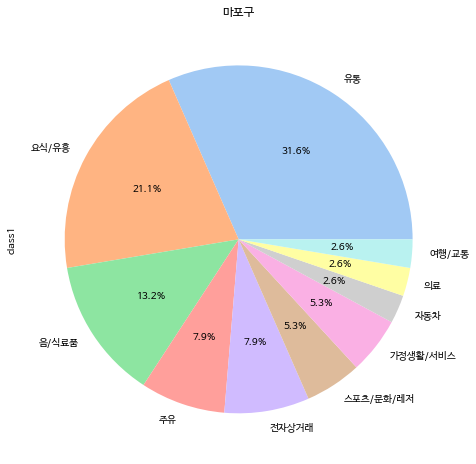

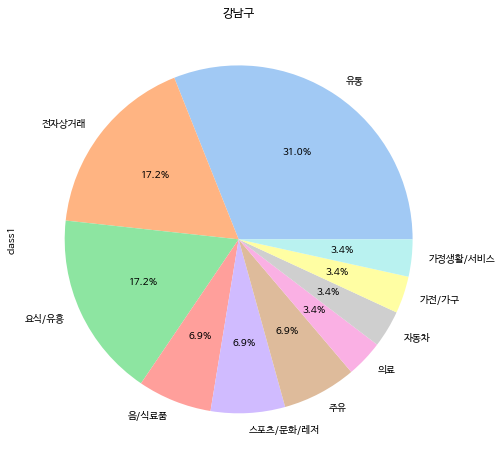

In [ ]:
#top3의 거래량은 어디서 오는걸까?
new_df=pd.DataFrame(df_3.query("sido == '서울'").sgg.value_counts()).rename({"sgg":"카드이용고객수"},axis=1)

def get_top3(df): 
    '''구매금액 상위 3곳 리턴'''
    return list(df.sort_values(by=['카드이용고객수'], ascending=False).index[:3])
    
topL=[]
topL.append(get_top3(new_df))
print(topL)

df_3.query("sgg ==['중구']")['class1'].value_counts().plot(kind = 'pie', subplots=True,autopct='%1.1f%%',textprops= {'fontsize' : 10},figsize = (15,8),colors=color)
plt.title("중구")
plt.show()
df_3.query("sgg ==['마포구']")['class1'].value_counts().plot(kind = 'pie', subplots=True,autopct='%1.1f%%',textprops= {'fontsize' : 10},figsize = (15,8),colors=color)
plt.title("마포구")
plt.show()
df_3.query("sgg ==['강남구']")['class1'].value_counts().plot(kind = 'pie', subplots=True,autopct='%1.1f%%',textprops= {'fontsize' : 10},figsize = (15,8),colors=color)
plt.title("강남구")
plt.show()

# 서울, 경기, 인천 (수도권) 의 카드이용고객수

수도권만 모아서 카드이용고객수를 살펴보았습니다.  
서울은 중구 마포구 강남구를 뒤이어 송파구 용산구가 많고  
**경기는 성남시**가 압도적으로 높으며 그 뒤론 고양시와 파주시가 옵니다.  
**인천은 부평구**가 압도적으로 높습니다.

위의 지역들은 **각 자치구별 거주인구 및 유동인구가 많은 구역**입니다.
그래서 자연스럽게 카드이용고객도 해당 지역에서 많은것으로 분석됩니다.

Text(0.5, 1.0, '인천 카드이용고객수')

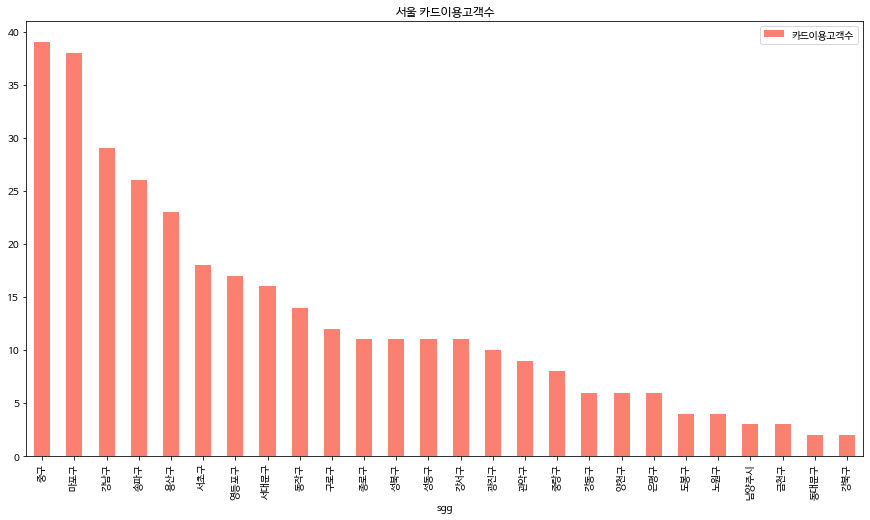

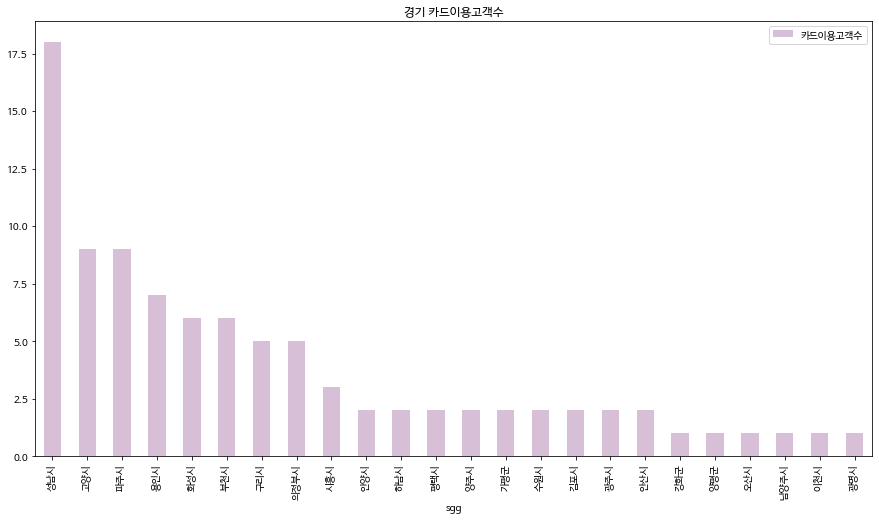

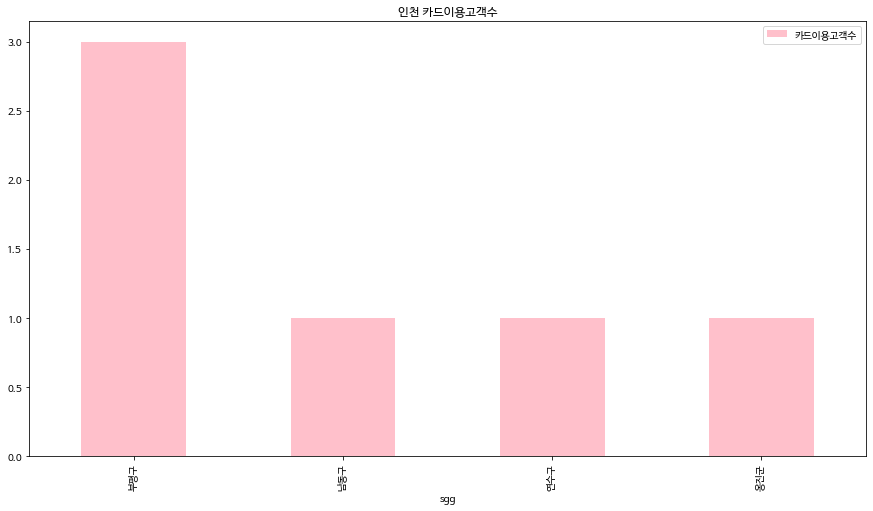

In [ ]:
new_s_df=pd.DataFrame(df_3.query("sido == '서울'").groupby(["sgg"]).usect_corr.count()).rename({"usect_corr":"카드이용고객수"},axis=1)
new_s_df.sort_values(by=['카드이용고객수'], ascending=False).plot(kind='bar', figsize = (15,8),color = 'salmon')
plt.title("서울 카드이용고객수")

new_g_df=pd.DataFrame(df_3.query("sido == '경기'").groupby(["sgg"]).usect_corr.count()).rename({"usect_corr":"카드이용고객수"},axis=1)
new_g_df.sort_values(by=['카드이용고객수'], ascending=False).plot(kind='bar', figsize = (15,8),color = 'thistle')
plt.title("경기 카드이용고객수")
new_i_df=pd.DataFrame(df_3.query("sido == '인천'").groupby(["sgg"]).usect_corr.count()).rename({"usect_corr":"카드이용고객수"},axis=1)
new_i_df.sort_values(by=['카드이용고객수'], ascending=False).plot(kind='bar', figsize = (15,8),color = 'pink')
plt.title("인천 카드이용고객수")

# 수도권 외 지역의 카드이용고객수

수도권이 아닌 지역의 카드이용고객수를 살펴본 결과
강원도가 압도적인 수치를 보였습니다.

Text(0.5, 1.0, '수도권 외 카드이용고객수')

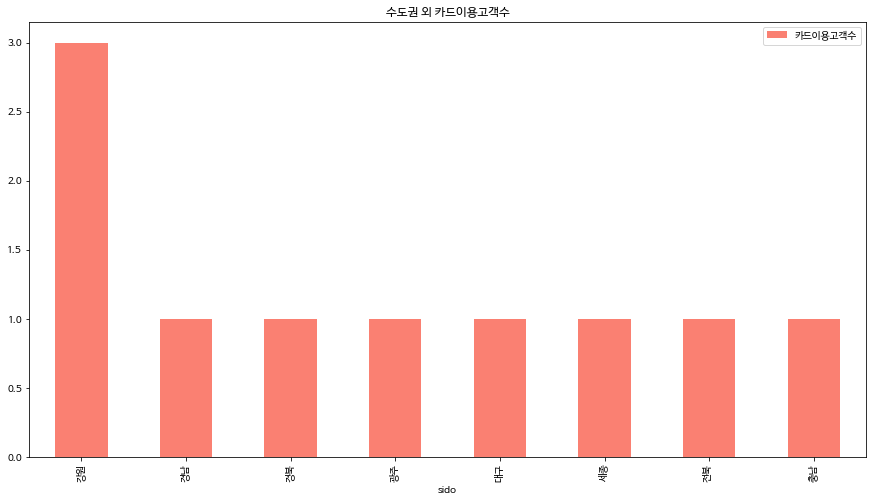

In [ ]:
new_w_df=pd.DataFrame(df_3.query("sido != ['서울','인천','경기']").groupby(["sido"]).usect_corr.count()).rename({"usect_corr":"카드이용고객수"},axis=1)
new_w_df.sort_values(by=['카드이용고객수'], ascending=False).plot(kind='bar', figsize = (15,8),color = 'salmon')
plt.title("수도권 외 카드이용고객수")

강원도는 어느 품목에서 거래량이 많은지 분석해본 결과
**여행/교통, 유통, 가정생활/서비스**가 같은 비율로 분석되었습니다.

강원도는 **관광산업으로 유명할 뿐더러 ktx 와 공항을 갖춘 지역**이기 때문에 으로 여행/교통의 비중이 높을 것으로 추측됩니다.

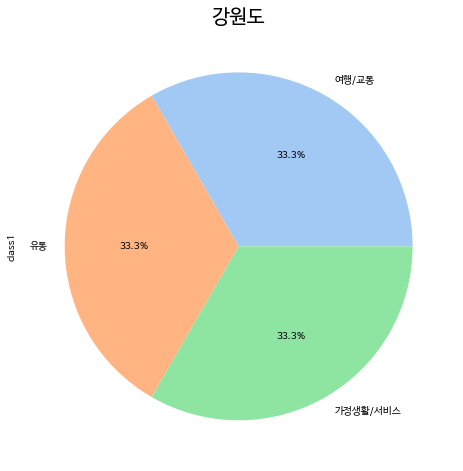

In [ ]:
df_3.query("sido ==['강원']")['class1'].value_counts().plot(kind = 'pie', subplots=True,autopct='%1.1f%%',textprops= {'fontsize' : 10},figsize = (15,8),colors=color)
plt.title("강원도", fontsize=20)
plt.show()


# DF3 분석내용정리

## <자치구>
자치구 기준 카드이용고객수를 살펴 보았을 때 수도권 (서울,경기,인천)이 카드이용고객가 많다.
## <시도>
시도 기준 카드이용고객수를 살펴 보면 1.서울 중구 2.서울 마포구 3.서울 강남구 였고 각각의 소비 상위 품목은 공통적으로 **유통과 요식/유흥**이었다.
독특하게 **중구는 의료가 마포구는 음/식료품이 강남구는 전자상거래**가 뒤를 이었습니다.

## <수도권>
수도권만 모아서 카드이용고객수를 살펴보니
**경기도는 성남시가, 인천은 부평구**가 카드이용고객수가 많다. 

**위의 지역들은 각 자치구별 거주인구 및 유동인구가 많은 구역이다. 그래서 자연스럽게 카드이용고객도 해당 지역에서 많은것으로 분석됐다.**
## <비수도권>
수도권 외의 카드이용고객수를 살펴보니 강원도가 카드이용고객수가 가장 많았고 여행/교통, 유통, 가정생활/서비스이 같은 비율로 높았다.

강원도는 관광산업으로 유명할 뿐더러 ktx 와 공항을 갖춘 지역이기 때문에 으로 여행/교통의 비중이 높을 것으로 분석했다.

# DF4 : 일별 시간대별 카드소비패턴


다음으로 DF4을 살펴보겠습니다.
DF4은 일별 시간대별 카드소비패턴 데이터이기 때문에 시간(년/월/일, 시간, 계절)에 집중해서 분석했습니다.

# 전처리
1. 구매일자 전처리  
구매일자를 연/월/요일로 나누어주었습니다.
2. 시간대(범주) 전처리  
1시 ~ 2시 (점심), 3시 ~ 4시 (낮), 5시 ~ 6시 (저녁) 으로 시간대를 나누었습니다.  

3. 계절 전처리  
3월 ~ 5월 (봄), 6월 ~ 8월(여름), 9월 ~ 10월(가을), 11월 ~ 2월(겨울)로 계절을 나누었습니다.


In [ ]:
# 구매일자 구분
df4['구매일자'] = df4['ymd'].astype(str).astype('datetime64') # 날짜정보를 담고 있는 de_dt 컬럼의 데이터 유형이 정수이기 때문
df4['연'] = df4['구매일자'].dt.year
df4['월'] = df4['구매일자'].dt.month
df4["요일"] = df4["구매일자"].apply(lambda x: ('월','화','수','목','금','토','일')[x.weekday()] + '요일')

#시간대(범주) 구분
#1시~2시 (점심), 3시~4시 (낮), 5시~6시 (저녁)
size=len(df4)
time_class={"구매시간(범주)":[]}

for i in range(size):
    if 1<=df4["time"][i]<=2 : 
        time_class["구매시간(범주)"].append("점심(1시,2시)")
    elif 3<=df4["time"][i]<=4:
        time_class["구매시간(범주)"].append("낮(3시,4시)")
    elif 5<=df4["time"][i]<=6:
        time_class["구매시간(범주)"].append("저녁(5시,6시)")
        
time_class_df=pd.DataFrame(time_class)
df4=pd.concat([df4,time_class_df],axis=1)

#계절구분
size=len(df4)
season_class={"계절":[]}

for i in range(size):
    if 9<=df4["월"][i]<=10:
        season_class["계절"].append("가을")
    elif 3<=df4["월"][i]<=5:
        season_class["계절"].append("봄")
    elif 6<=df4["월"][i]<=8:
        season_class["계절"].append("여름")
    else : 
        season_class["계절"].append("겨울")
        
season_class=pd.DataFrame(season_class)
df4=pd.concat([df4,season_class],axis=1)
df4

,class1,ymd,time,tot_reg_cd,amt_corr,usect_corr,구매일자,연,월,요일,구매시간(범주),계절
0,요식/유흥,20161004,6,1123076010009,104624,10,2016-10-04,2016,10,화요일,"저녁(5시,6시)",가을
1,유통,20210303,5,1122060030003,382592,20,2021-03-03,2021,3,수요일,"저녁(5시,6시)",봄
2,유통,20170606,6,1123066022301,341688,5,2017-06-06,2017,6,화요일,"저녁(5시,6시)",여름
3,스포츠/문화/레저,20171206,5,1124075020103,925118,5,2017-12-06,2017,12,수요일,"저녁(5시,6시)",겨울
4,의료,20160909,6,1113075030002,217985,50,2016-09-09,2016,9,금요일,"저녁(5시,6시)",가을
...,...,...,...,...,...,...,...,...,...,...,...,...
495,전자상거래,20170727,2,1120069010006,90540,25,2017-07-27,2017,7,목요일,"점심(1시,2시)",여름
496,유통,20190406,3,1123072010303,1211325,20,2019-04-06,2019,4,토요일,"낮(3시,4시)",봄
497,교육/학원,20210107,3,1119072030101,266590,15,2021-01-07,2021,1,목요일,"낮(3시,4시)",겨울
498,전자상거래,20200426,4,1105063030203,547264,25,2020-04-26,2020,4,일요일,"낮(3시,4시)",봄


# 이상치 제거 
이상치를 제거하는 과정을 거쳤습니다.   
이상치의 기준은 카드이용금액계(AMT_CORR)와 카드이용건수계(USECT_CORR)를 boxplot으로 시각화하여 지나치게 튀는 값들은 제거해 주었습니다.

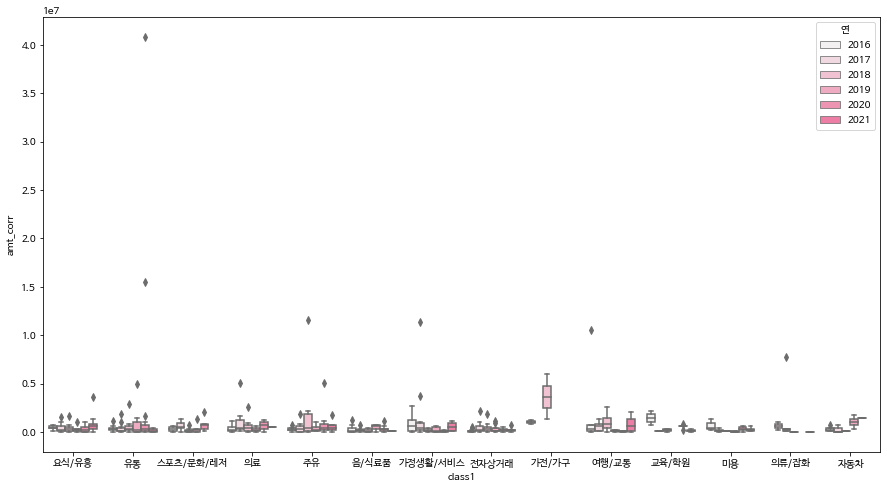

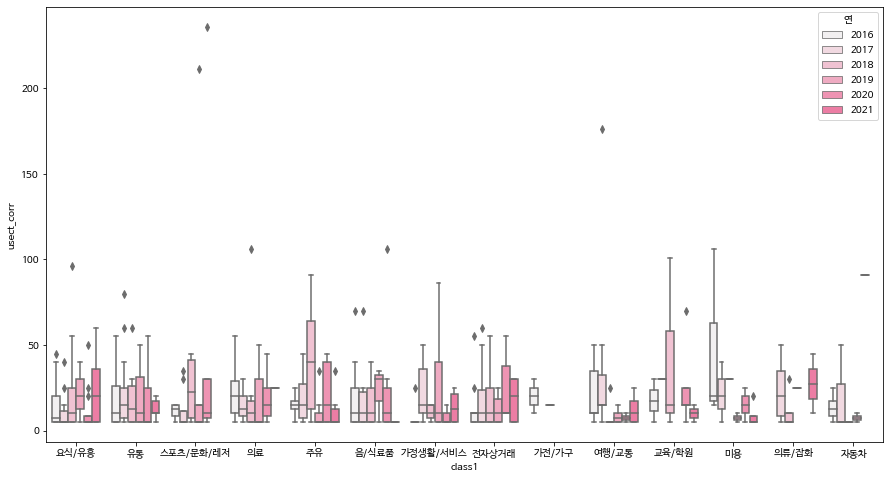

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(data=df4, x="class1", y="amt_corr", hue="연",color= '#ff6a9e')
plt.show()

plt.figure(figsize = (15,8))
sns.boxplot(data=df4, x="class1", y="usect_corr", hue="연",color= '#ff6a9e')
plt.show()

이상치는 아래와 같습니다.    
유통, 주유, 가정생활/서비스, 여행/교통, 의류/잡화, 스포츠/문화/레저 에서 이상치가 발견되어 아래 9개의 데이터는 제거하였습니다.

In [ ]:
#이상치
print(df4.query("class1 == '유통'")["amt_corr"].sort_values(ascending = False).index[0])
print(df4.query("class1 == '유통'")["amt_corr"].sort_values(ascending = False).index[1])
print(df4.query("class1 == '주유'")["amt_corr"].sort_values(ascending = False).index[0])
print(df4.query("class1 == '가정생활/서비스'")["amt_corr"].sort_values(ascending = False).index[0])
print(df4.query("class1 == '여행/교통'")["amt_corr"].sort_values(ascending = False).index[0])
print(df4.query("class1 == '의류/잡화'")["amt_corr"].sort_values(ascending = False).index[0])
print(df4.query("class1 == '스포츠/문화/레저'")["usect_corr"].sort_values(ascending = False).index[0])
print(df4.query("class1 == '스포츠/문화/레저'")["usect_corr"].sort_values(ascending = False).index[1])
print(df4.query("class1 == '여행/교통'")["usect_corr"].sort_values(ascending = False).index[0])


121
102
170
444
499
267
390
250
252


최종적으로 총 491건의 데이터를 이용하여 분석을 시작하였습니다.

In [ ]:
df4 = df4.drop(index=[121,102,170,444,499,267,390,250,252])
df4.reset_index(drop=True, inplace=True)
df4

,class1,ymd,time,tot_reg_cd,amt_corr,usect_corr,구매일자,연,월,요일,구매시간(범주),계절
0,요식/유흥,20161004,6,1123076010009,104624,10,2016-10-04,2016,10,화요일,"저녁(5시,6시)",가을
1,유통,20210303,5,1122060030003,382592,20,2021-03-03,2021,3,수요일,"저녁(5시,6시)",봄
2,유통,20170606,6,1123066022301,341688,5,2017-06-06,2017,6,화요일,"저녁(5시,6시)",여름
3,스포츠/문화/레저,20171206,5,1124075020103,925118,5,2017-12-06,2017,12,수요일,"저녁(5시,6시)",겨울
4,의료,20160909,6,1113075030002,217985,50,2016-09-09,2016,9,금요일,"저녁(5시,6시)",가을
...,...,...,...,...,...,...,...,...,...,...,...,...
486,전자상거래,20180619,4,1125072020311,65390,10,2018-06-19,2018,6,화요일,"낮(3시,4시)",여름
487,전자상거래,20170727,2,1120069010006,90540,25,2017-07-27,2017,7,목요일,"점심(1시,2시)",여름
488,유통,20190406,3,1123072010303,1211325,20,2019-04-06,2019,4,토요일,"낮(3시,4시)",봄
489,교육/학원,20210107,3,1119072030101,266590,15,2021-01-07,2021,1,목요일,"낮(3시,4시)",겨울


*분석에 앞서 구매일자를 살펴보니 df4 데이터의 마지막 집계일은 2021년 7월 31입니다.
따라서 다른년도에 비해 집계된 데이터자체가 적으니 2021년은 분석시 비중을 크게 두진 않았습니다.*

In [ ]:
df4.구매일자.sort_values()

425   2016-01-01
229   2016-01-02
181   2016-01-02
468   2016-01-06
32    2016-01-10
         ...    
332   2021-07-23
295   2021-07-23
427   2021-07-28
49    2021-07-31
400   2021-07-31
Name: 구매일자, Length: 491, dtype: datetime64[ns]

# 카드사용자수/ 카드사용총액
연도별 카드이용고객수는 큰 변화가 없습니다.   
하지만 카드 사용총액을 보면 2019년에 급하락하고 2020년엔 상승하는 양상을 보입니다.  


**2019년은 코로나 19의 본격적인 확산으로 소비가 침체되었던 시기입니다.**

따라서 이 현상이 데이터에 반영된것으로 추측됩니다


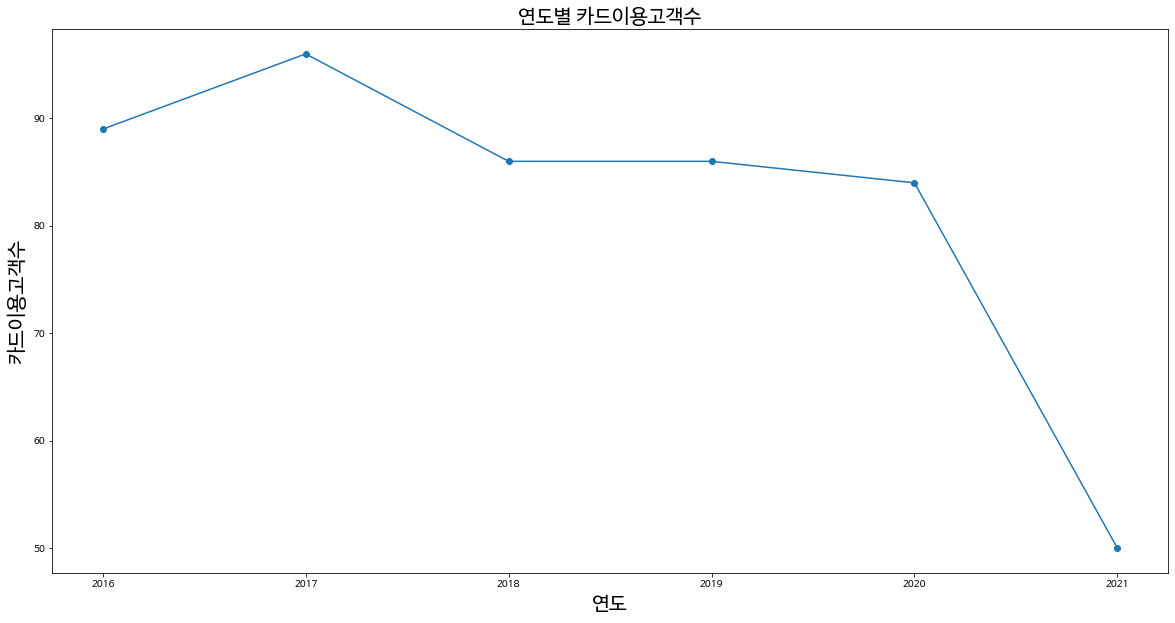

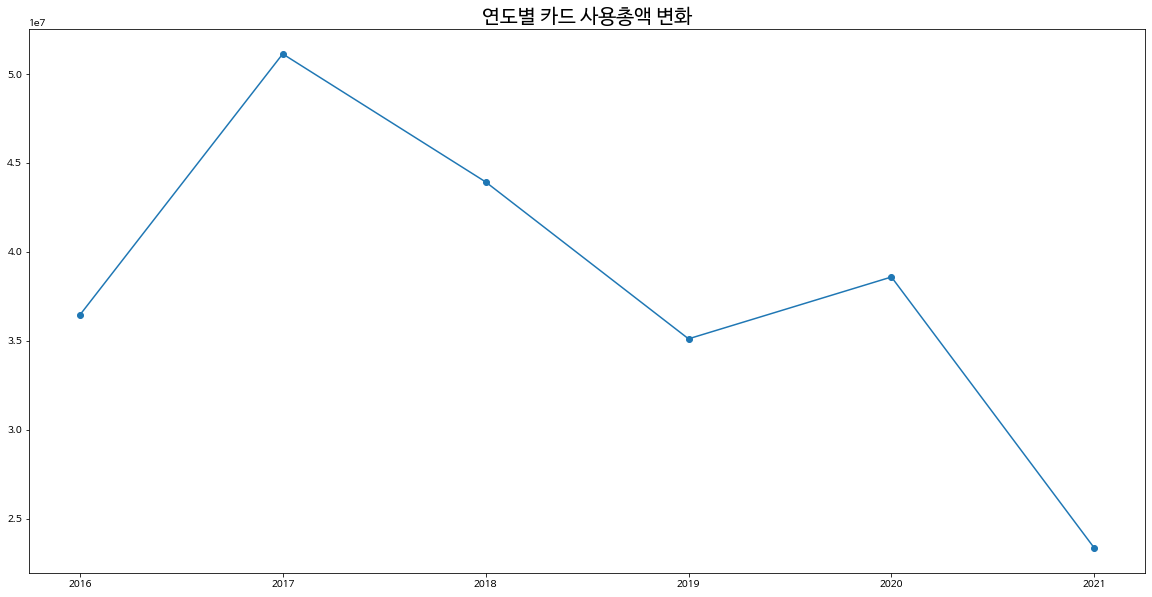

In [ ]:
year_df=pd.DataFrame(df4.groupby("연")['usect_corr'].count()).reset_index()
yearsum_df=pd.DataFrame(df4.groupby("연")["amt_corr"].sum()).reset_index() #카드사용총액
aa = pd.pivot_table(df4, index = "연", columns = "class1",values = "usect_corr", aggfunc = "count", fill_value = 0)

#카드이용고객수
plt.figure(figsize = (20, 10))

plt.title("연도별 카드이용고객수", fontsize=20)
plt.plot(year_df['연'],year_df['usect_corr'],marker='o') ## 선그래프 생성
plt.xlabel('연도', fontsize=20)
plt.ylabel('카드이용고객수',fontsize=20)

#사용총액변화
plt.figure(figsize = (20, 10))
plt.plot(year_df['연'],yearsum_df['amt_corr'],marker='o') 

plt.title('연도별 카드 사용총액 변화',fontsize=20) ## 타이틀 설정
plt.show()



# 연도/품목별 카드이용고객수
연도에 품목까지 추가하여 연도/품목별 카드이용고객수를 살펴보겠습니다.  
**2019년 전자상거래 이용고객은 급감한 반면 유통 고객은 급상승**하였고   
다음해인 **2020년엔 유통 이용고객이 급감한 반면 전자상거래 이용고객은 상승**하였습니다.

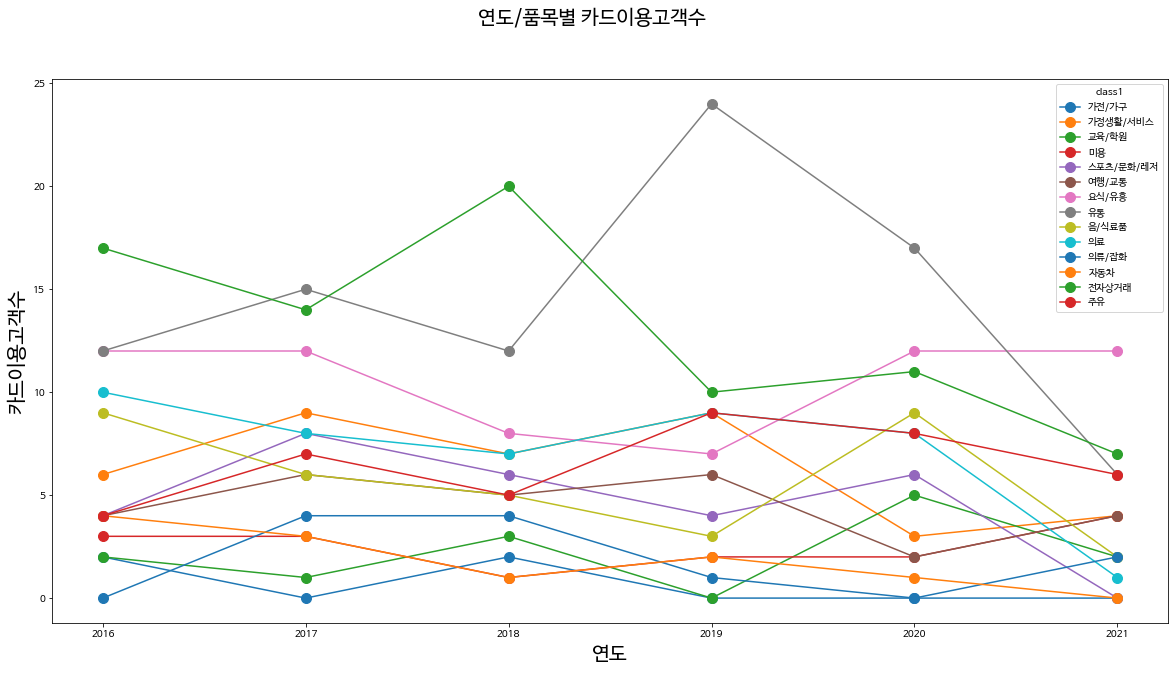

In [ ]:
aa.plot(marker = "o", markersize = 10, figsize = (20, 10))
plt.xlabel('연도', fontsize=20)
plt.ylabel('카드이용고객수',fontsize=20)

plt.suptitle('연도/품목별 카드이용고객수', fontsize = 20)
plt.show()

# 연도/품목별 총 카드결제건수

이번엔 인당 여러번 결제한 건도 포함한 총 카드결제건수를 살펴보겠습니다.  


1. **유통**: 위에서 본 카드사용고객수 그래프와 같은 양상으로 유통의 총 카드결제건수가 2019년 급상승하였습니다  



2. **전자상거래**: 전자상거래가 2018년에 비해 2019년 급감하지만 전체 품목중 2020년 1위를 차지하였습니다.  
이는 코로나 초기 전세계적으로 공장 가동에 마비가 오고 경제가 침체되어 전자상거래의 비중이 확 줄었지만 코로나에 어느정도 익숙해진 후 다음해인 2020년엔 공장정상화와 더불어 전자상거래의 엄청난 확산으로 그 이용이 압도적으로 많아진 현상으로 추측됩니다.





3. **요식/유흥** :  2021년의 집계가 7월까지임에도 불구하고 요식/유흥이 급증한 것은 2021년 거리두기의 완화로 외식이 늘어난것의 증거로 보여집니다.


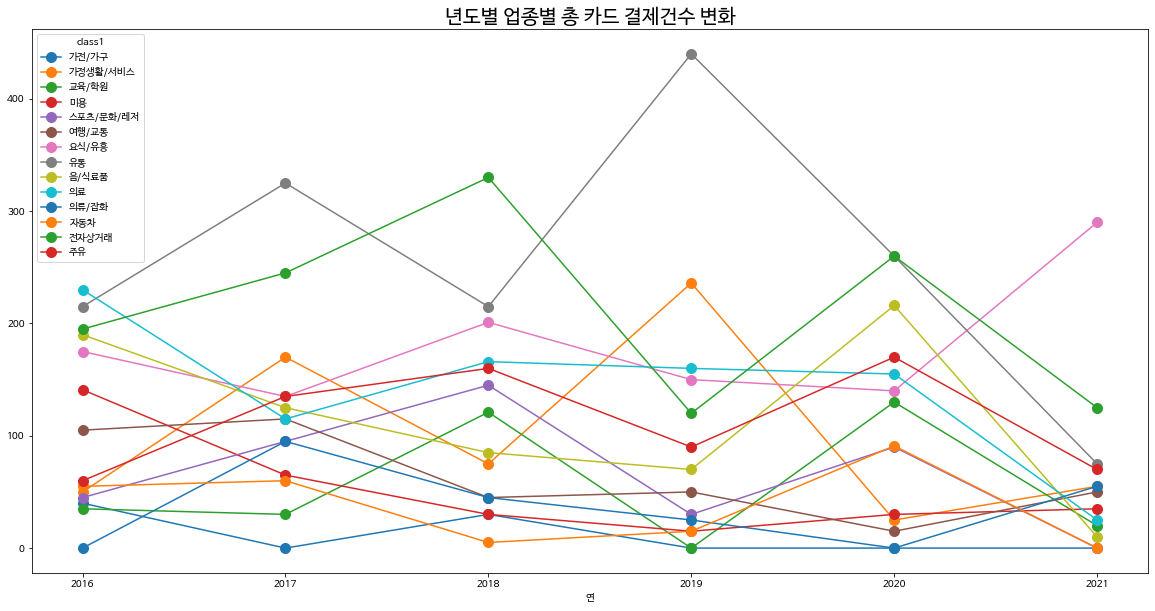

In [ ]:
pd.pivot_table(df4, index = "연", columns = "class1",
                values = "usect_corr", aggfunc = "sum", fill_value = 0).plot(marker = "o", markersize = 10, figsize = (20, 10))
plt.title("년도별 업종별 총 카드 결제건수 변화", fontsize = 20)
plt.show()

# 요일/업종별 카드 사용자수
다음으론 요일/업종별 카드 사용자수를 살펴보았습니다.

heatmap을 보면 전체 중 
1. **일요일 전자상거래**에 카드 소비가 가장 많습니다. 일요일이 휴일이라는 점을 생각해보면 사람들이 주말에 전자상거래로 카드소비를 많이하는것으로 분석됩니다.

2. 다른 품목에선 **유통, 요식/유흥이 다른 항목에 비해 일주일 내내 평균이상의 카드소비자**가 있음이 확인됩니다.

Text(0.5, 1.0, '요일별 업종별 카드 사용자수')

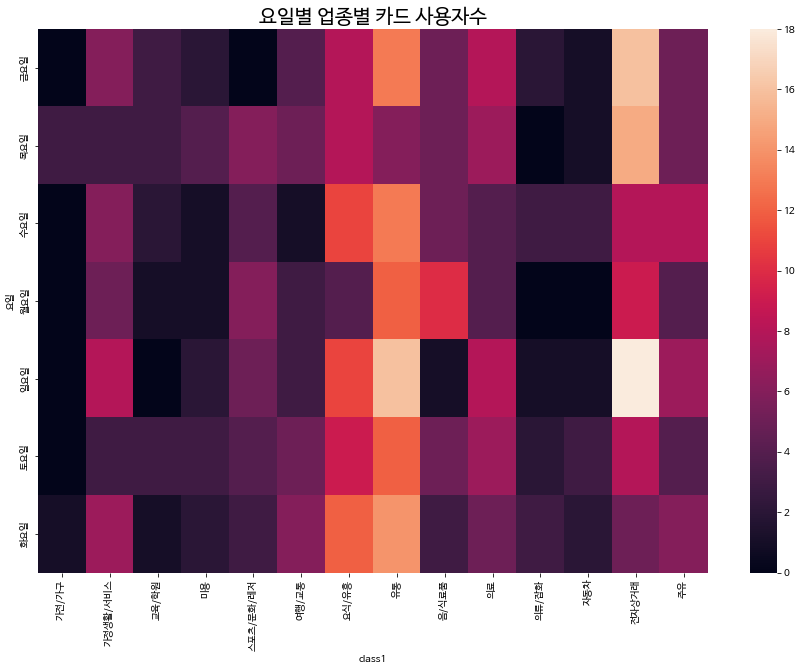

In [ ]:
day_df = pd.pivot_table(df4, index = "요일", columns = "class1",
                values = "usect_corr", aggfunc = "count", fill_value = 0)
plt.figure(figsize = (15, 10))
sns.heatmap(day_df)
plt.title("요일별 업종별 카드 사용자수", fontsize = 20)

# 계절/품목별 카드사용건수
다음은 계절/품목별 카드사용건수를 살펴보았습니다.

전체적으로 **유통, 전자상거래, 요식/유흥**의 비중이 높습니다. 역시나 사계절을 통틀어봐도 먹고 물건을 사는것에 소비가 항상 높은것으로 확인됩니다.

더 자세히 살펴보기위해  품목/ 계절별 특징을 알아보았습니다.

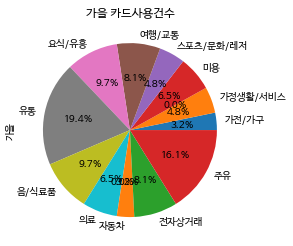

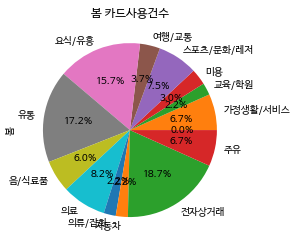

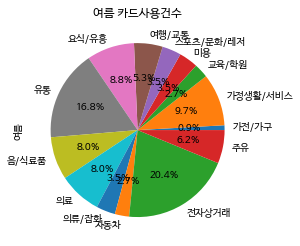

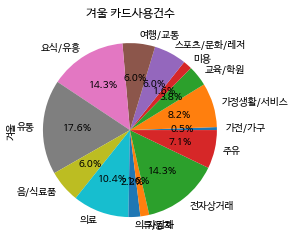

In [ ]:
season_df = pd.pivot_table(df4, index = "계절", columns = "class1",
                values = "usect_corr", aggfunc = "count", fill_value = 0)

s = list(df4["계절"].unique())
for c in s :
    for indx in season_df.index:
        if indx==c :
            plt.title("{0} 카드사용건수".format(indx))
            season_df.loc[indx].plot(kind = 'pie', subplots=True,autopct='%1.1f%%',textprops= {'fontsize' : 10},figsize = (15,8))
            plt.show()

# 품목/계절별 카드사용건수

유통,  주유, 음/식료품, 미용, 자동차 등의 품목들은 계절성이 없는 품목이여서 계절에 상관없이 고른 비율을 보입니다.

하지만 
1. **의류 / 잡화**는 겨울과 여름에 건수가 많고 (아마 가을과 봄 옷은 따로 준비하지 않지만 여름 겨울옷은 준비하기 떄문이라고 추측됩니다 )   
2. **교육/학원**은 겨울에 비율이 압도적입니다. (겨울방학 및 신년맞이 학원개강 등의 이유라고 생각됩니다)

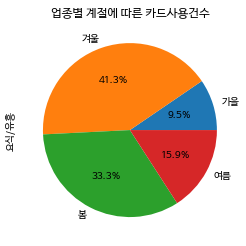

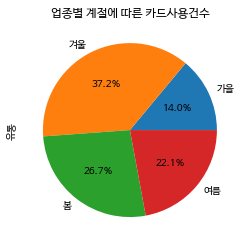

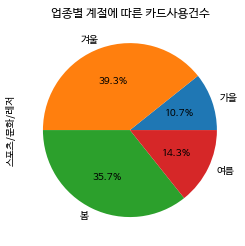

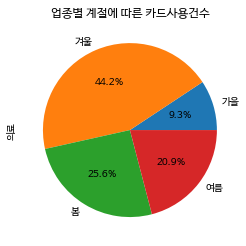

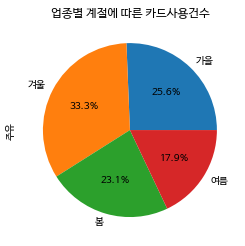

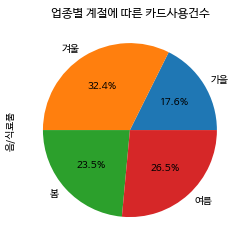

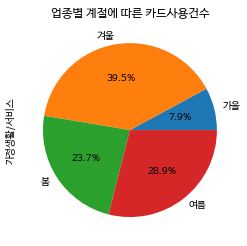

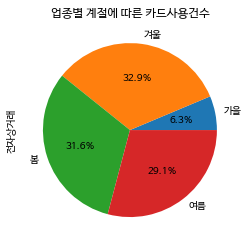

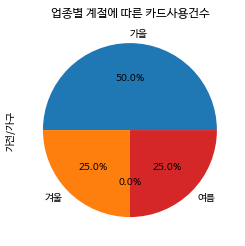

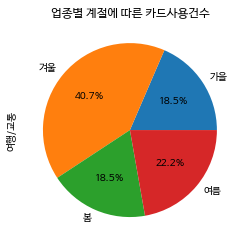

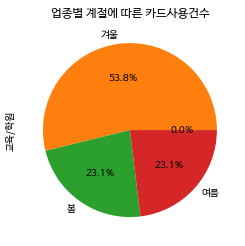

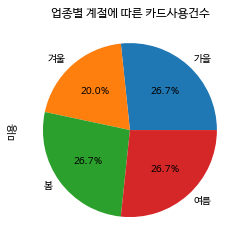

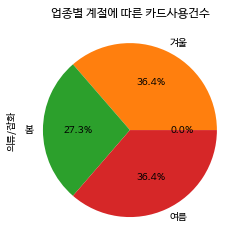

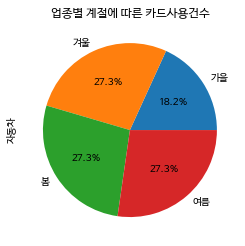

In [ ]:
season2_df = pd.pivot_table(df4, index = "class1", columns = "계절",
                values = "구매일자", aggfunc = "size", fill_value = 0)

s = list(df4["class1"].unique())
for c in s :
    for indx in season2_df.index:
        if indx==c :
            plt.title("업종별 계절에 따른 카드사용건수")
            season2_df.loc[indx].plot(kind = 'pie', subplots=True,autopct='%1.1f%%',textprops= {'fontsize' : 10},figsize = (15,8))
            plt.show()

# DF4 분석내용정리

## <년도>
코로나19의 여파로 2019년 이후 카드소비패턴에 변화가 보인다.
특히 전자상거래에서의 거래가 2019년에 들어서 급감하지만 2020년엔 전체 품목 중 1위를 차지한다.
이는 **코로나 초기 전세계적으로 공장 가동에 마비**가 오고 **경제가 침체**되어 전자상거래의 비중이 확 줄었지만 코로나에 어느정도 익숙해진 후 다음해인 2020년엔 **공장정상화**와 더불어 **전자상거래의 엄청난 확산**으로 그 이용이 압도적으로 많아진 현상으로 추측된다.

또한 요식/유흥은 2021년의 집계가 7월까지임에도 불구하고 해당 년도에 급증하였는데, 이는 거리두기의 완화로 외식이 늘어난것의 증거로 보여진다.

## <요일>
요일별로 살펴보았을 때 유통과 요식/유흥은 요일 관계없이 평균이상의 소비가 보여졌다.
하나 특별한 것은 전체 카드 사용자수가 **일요일 전자상거래**에 가장 많다는 점이였다. 
일요일이 휴일이라는 점을 생각해보면 사람들이 주말에 전자상거래로 카드소비를 많이하는것으로 분석된다.

## <계절>
계절성을 타지 않는 유통, 주유, 음/식료품, 미용, 자동차 등의 품목들은 계절별 소비비율이 비슷하다.

하지만 계절별(여름,겨울)로 출시되는 상품이 다른 의류 / 잡화 나 수강개설이 겨울(신년,겨울방학)에 많은 교육/학원은 계절성을 타는 품목으로 데이터가 이를 설명해준다.
